# Look at time series of ocean dynamics (zos variable) from CMIP5 and CMIP6 models

In [1]:
import sys

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../code/')
import mod_loc as loc
import mod_postpro as pp

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [2]:
import dask.config as dc
dc.set(**{'array.slicing.split_large_chunks': True})

In [3]:
python_data_dir = '../outputs/'

In [4]:
cmip5_zos = pp.read_zos_ds(python_data_dir, 'cmip5', 'rcp85')
cmip5_zos = loc.rotate_longitude(cmip5_zos, 'lon')
cmip5_zos

<xarray.Dataset>
Dimensions:                 (lat: 180, lon: 360, model: 30, time: 201)
Coordinates:
  * model                   (model) object 'ACCESS1-0' 'CCSM4' ... 'inmcm4'
  * time                    (time) float64 1.9e+03 1.902e+03 ... 2.1e+03 2.1e+03
  * lat                     (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                     (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
Data variables:
    CorrectedReggrided_zos  (model, time, lat, lon) float64 dask.array<chunksize=(1, 106, 180, 360), meta=np.ndarray>
Attributes:
    source_file:        This NetCDF file was built from ComputeOceanDynmicSea...
    creation_date:      2021-07-17 02:38
    emission_scenario:  historical

In [5]:
cmip6_zos = pp.read_zos_ds(python_data_dir, 'cmip6', 'ssp585')
cmip6_zos

<xarray.Dataset>
Dimensions:                 (lat: 180, lon: 360, model: 30, time: 200)
Coordinates:
  * model                   (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * time                    (time) float64 1.9e+03 1.902e+03 ... 2.1e+03
  * lat                     (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                     (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
Data variables:
    CorrectedReggrided_zos  (model, time, lat, lon) float64 dask.array<chunksize=(1, 115, 180, 360), meta=np.ndarray>
Attributes:
    source_file:        This NetCDF file was built from ComputeOceanDynmicSea...
    creation_date:      2021-07-15 00:33
    emission_scenario:  historical

In [6]:
start_year = 1970 #2006
end_year = 2101

lon_min, lon_max, lat_min, lat_max = pp.define_area('knmi14_reg')

In [7]:
cmip5_df = pp.ds2df(cmip5_zos, lon_min, lon_max, lat_min, lat_max, start_year, end_year)
cmip6_df = pp.ds2df(cmip6_zos, lon_min, lon_max, lat_min, lat_max, start_year, end_year)
cmip5_df

ACCESS1-0     CCSM4  CMCC-CESM    CMCC-CM   CMCC-CMS   CNRM-CM5  \
time                                                                      
1970.5  -0.243048  4.175518   0.642225  -3.006820  -3.165876  -1.908402   
1971.5   0.347616 -1.920220  -1.707167  -7.937964  -0.813292  -1.230439   
1972.5   3.353305  2.632192  -2.889289  -3.212019  -1.363765  -2.763005   
1973.5   2.054720 -2.662423  -2.703799  -5.479006  -2.423914  -2.707711   
1974.5   2.594338  2.817293   1.107223  -6.262400   0.327743   2.738156   
...           ...       ...        ...        ...        ...        ...   
2096.5  29.747017  7.706617   3.766086  30.209531  15.959838  10.440363   
2097.5  28.999995  4.342850   2.640533  28.463015  18.035082  14.177257   
2098.5  23.324769 -4.485760   5.546135  29.233492  21.598756  12.906488   
2099.5  29.915163  0.957046   9.330667  30.328542  15.126255  16.142762   
2100.5  33.850191  5.868665   9.332808  29.234094  15.497313  16.350510   

        CSIRO-Mk3-6-0   CanESM2   EC-EARTH   GFDL-CM3  ...  MIROC-ESM-CHEM  \
time                                                   ...                   
1970.5       2.801536 -1.152520   1.630660   5.094679  ...       -0.590962   
1971.5      -1.053842 -0.763835   0.623592   1.770860  ...       -0.427817   
1972.5      -2.797273 -1.342038  -1.194059   0.344451  ...        0.811839   
1973.5      -1.978643 -0.901997  -3.155632   2.259697  ...        2.994870   
1974.5      -8.028536 -0.841905  -2.655453  -1.610189  ...        3.696499   
...               ...       ...        ...        ...  ...             ...   
2096.5       9.658714  1.444744  18.139587  24.705365  ...       23.431117   
2097.5       9.703578  1.332882  18.822497  21.282457  ...       27.481724   
2098.5       7.314450  2.082810  19.210721  20.444957  ...       26.455739   
2099.5       4.521981  1.758100  18.188857  20.512084  ...       22.946876   
2100.5      13.981528  0.197261  18.919627  21.543447  ...       23.836790   

           MIROC5  MPI-ESM-LR  MPI-ESM-MR  MRI-CGCM3  NorESM1-M  NorESM1-ME  \
time                                                                          
1970.5  -5.353272   -1.072962    1.547471   6.103464   1.924685    0.843598   
1971.5  -3.238575   -2.449846    0.963686   6.875356   0.332754   -1.144099   
1972.5  -4.780272   -4.809661   -2.402049   7.419453   1.698875   -0.038574   
1973.5  -4.465122   -1.001683   -6.350661   3.502792  -1.084361   -1.609359   
1974.5  -5.269957   -1.788224   -4.653011   1.515590  -2.296764   -1.535019   
...           ...         ...         ...        ...        ...         ...   
2096.5  26.950402    8.486791   20.926107  22.099244  -2.103310   -0.486774   
2097.5  28.191058   11.431763   18.302503  25.382684  -2.035982   -4.872329   
2098.5  28.799622   11.801288   19.839020  22.437457  -2.792578   -4.602730   
2099.5  31.290689   12.005921   21.853070  19.932089  -5.309129   -5.134100   
2100.5  29.370795   14.867581   19.633758  19.388346  -3.233759   -3.110266   

        bcc-csm1-1  bcc-csm1-1-m     inmcm4  
time                                         
1970.5    1.725041      1.665476  -2.790811  
1971.5    0.756576     -0.552870  -0.294512  
1972.5   -6.555292     -4.273898  -3.181357  
1973.5   -5.259092     -4.060985  -0.460209  
1974.5   -4.350702      3.149426  -7.126086  
...            ...           ...        ...  
2096.5   20.021607      7.454393  17.682422  
2097.5   14.967147      4.463119  13.554825  
2098.5   13.953347      2.751101  15.274026  
2099.5   20.598544      4.370106  13.987851  
2100.5   22.431972      8.885593  14.694936  

[131 rows x 30 columns]

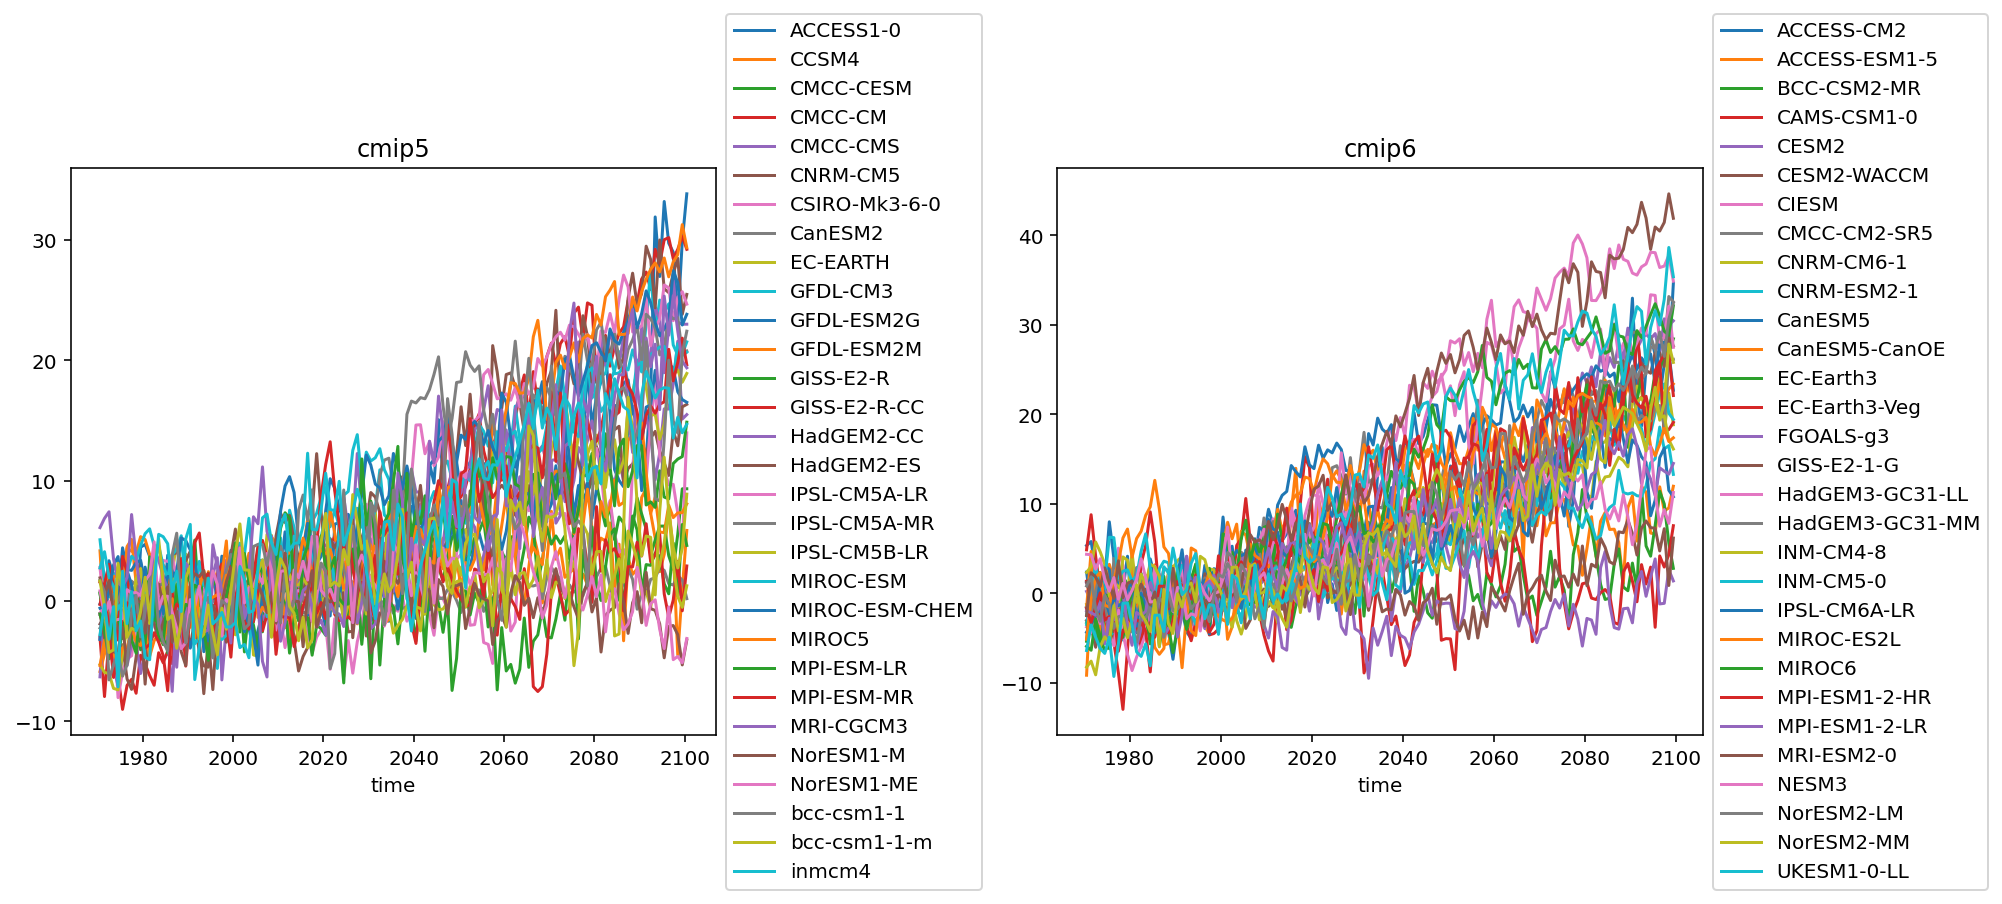

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(14,6))

cmip5_df.plot(ax=axes[0], title='cmip5').legend(loc='center left', 
                                                bbox_to_anchor=(1, 0.5))
cmip6_df.plot(ax=axes[1], title='cmip6').legend(loc='center left', 
                                                bbox_to_anchor=(1, 0.5))

fig.tight_layout()

### Check the value distribution in 2090-2100

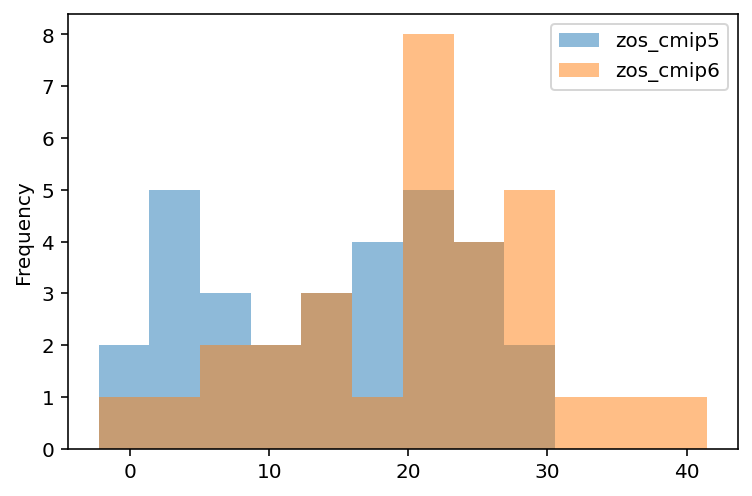

In [27]:
d = {'zos_cmip5': cmip5_df.loc[2090.5:2099.5].mean(axis=0),
     'zos_cmip6': cmip6_df.loc[2090.5:2099.5].mean(axis=0)}
both_cmip_df = pd.DataFrame(d)
both_cmip_df.plot.hist(bins=12, alpha=0.5);

### Check the mean and likely range

In [28]:
stat_df = pd.DataFrame(cmip5_df.mean(axis=1), columns=['cmip5_mean'] )
stat_df['cmip5_std'] = cmip5_df.std(axis=1)
stat_df['cmip5_95pc'] = stat_df['cmip5_mean'] + 1.64*stat_df['cmip5_std']
stat_df['cmip5_5pc'] = stat_df['cmip5_mean'] - 1.64*stat_df['cmip5_std']
stat_df['cmip6_mean'] = cmip6_df.mean(axis=1)
stat_df['cmip6_std'] = cmip6_df.std(axis=1)
stat_df['cmip6_95pc'] = stat_df['cmip6_mean'] + 1.64*stat_df['cmip6_std']
stat_df['cmip6_5pc'] = stat_df['cmip6_mean'] - 1.64*stat_df['cmip6_std']


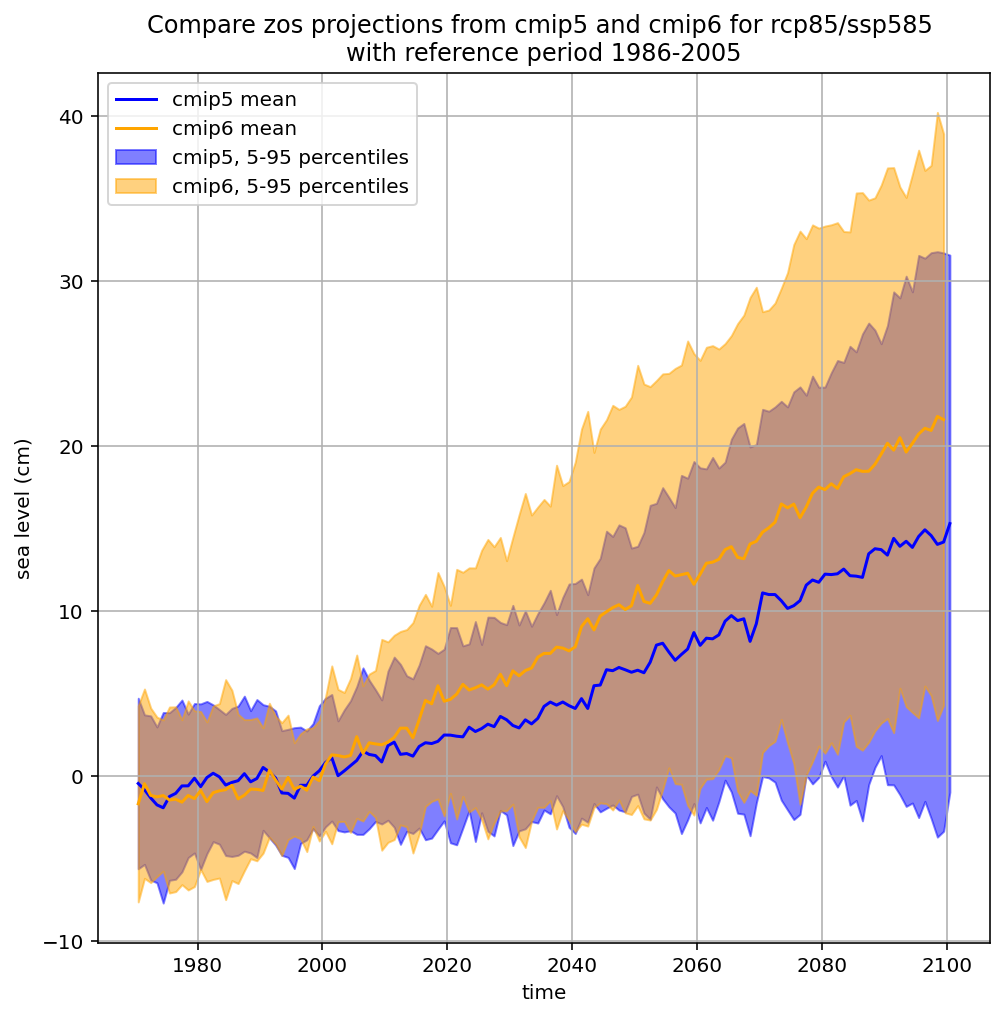

In [30]:
sce = 'rcp85/ssp585'
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.fill_between(stat_df.index, stat_df['cmip5_95pc'], 
                stat_df['cmip5_5pc'], color='blue',alpha=0.5,
               label='cmip5, 5-95 percentiles')
ax.fill_between(stat_df.index, stat_df['cmip6_95pc'], 
                stat_df['cmip6_5pc'], color='orange',alpha=0.5,
               label='cmip6, 5-95 percentiles')
ax.plot(stat_df['cmip5_mean'], color='blue', label='cmip5 mean')
ax.plot(stat_df['cmip6_mean'], color='orange', label='cmip6 mean')

plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title(f'Compare zos projections from cmip5 and cmip6 for {sce} \n'+
         'with reference period 1986-2005')
ax.grid(True)
plt.legend(loc='upper left')

plt.savefig('../figures/zos_comp_rcp85_ssp585_DutchCoast_ts.pdf', dpi=150)

In [32]:
stat_df.loc[2090.5:2099.5].mean(axis=0)

cmip5_mean    14.224292
cmip5_std      9.840540
cmip5_95pc    30.362778
cmip5_5pc     -1.914193
cmip6_mean    20.658255
cmip6_std     10.084730
cmip6_95pc    37.197213
cmip6_5pc      4.119298
dtype: float64

In [35]:
stat_df.loc[2099.5]

cmip5_mean    14.201488
cmip5_std     10.686332
cmip5_95pc    31.727072
cmip5_5pc     -3.324097
cmip6_mean    21.623431
cmip6_std     10.558025
cmip6_95pc    38.938592
cmip6_5pc      4.308270
Name: 2099.5, dtype: float64

### Temporal evolution of the standard deviations

<AxesSubplot:xlabel='time'>

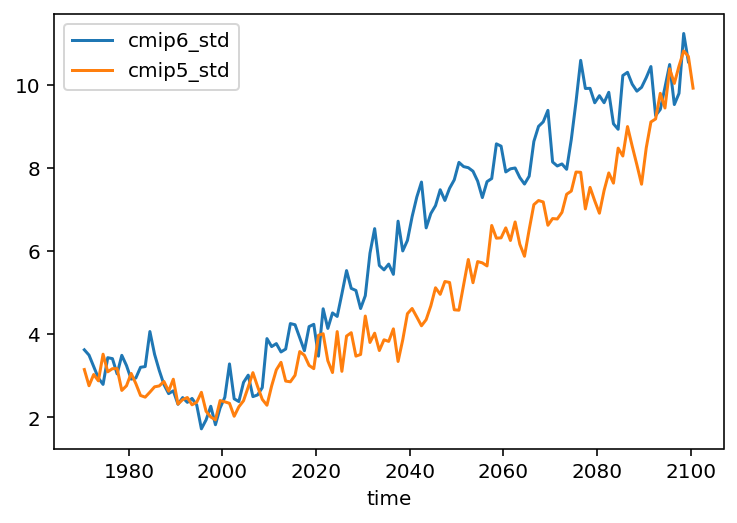

In [36]:
stat_df[['cmip6_std', 'cmip5_std']].plot()

### Check individual time series for a given region for all models and scenarios

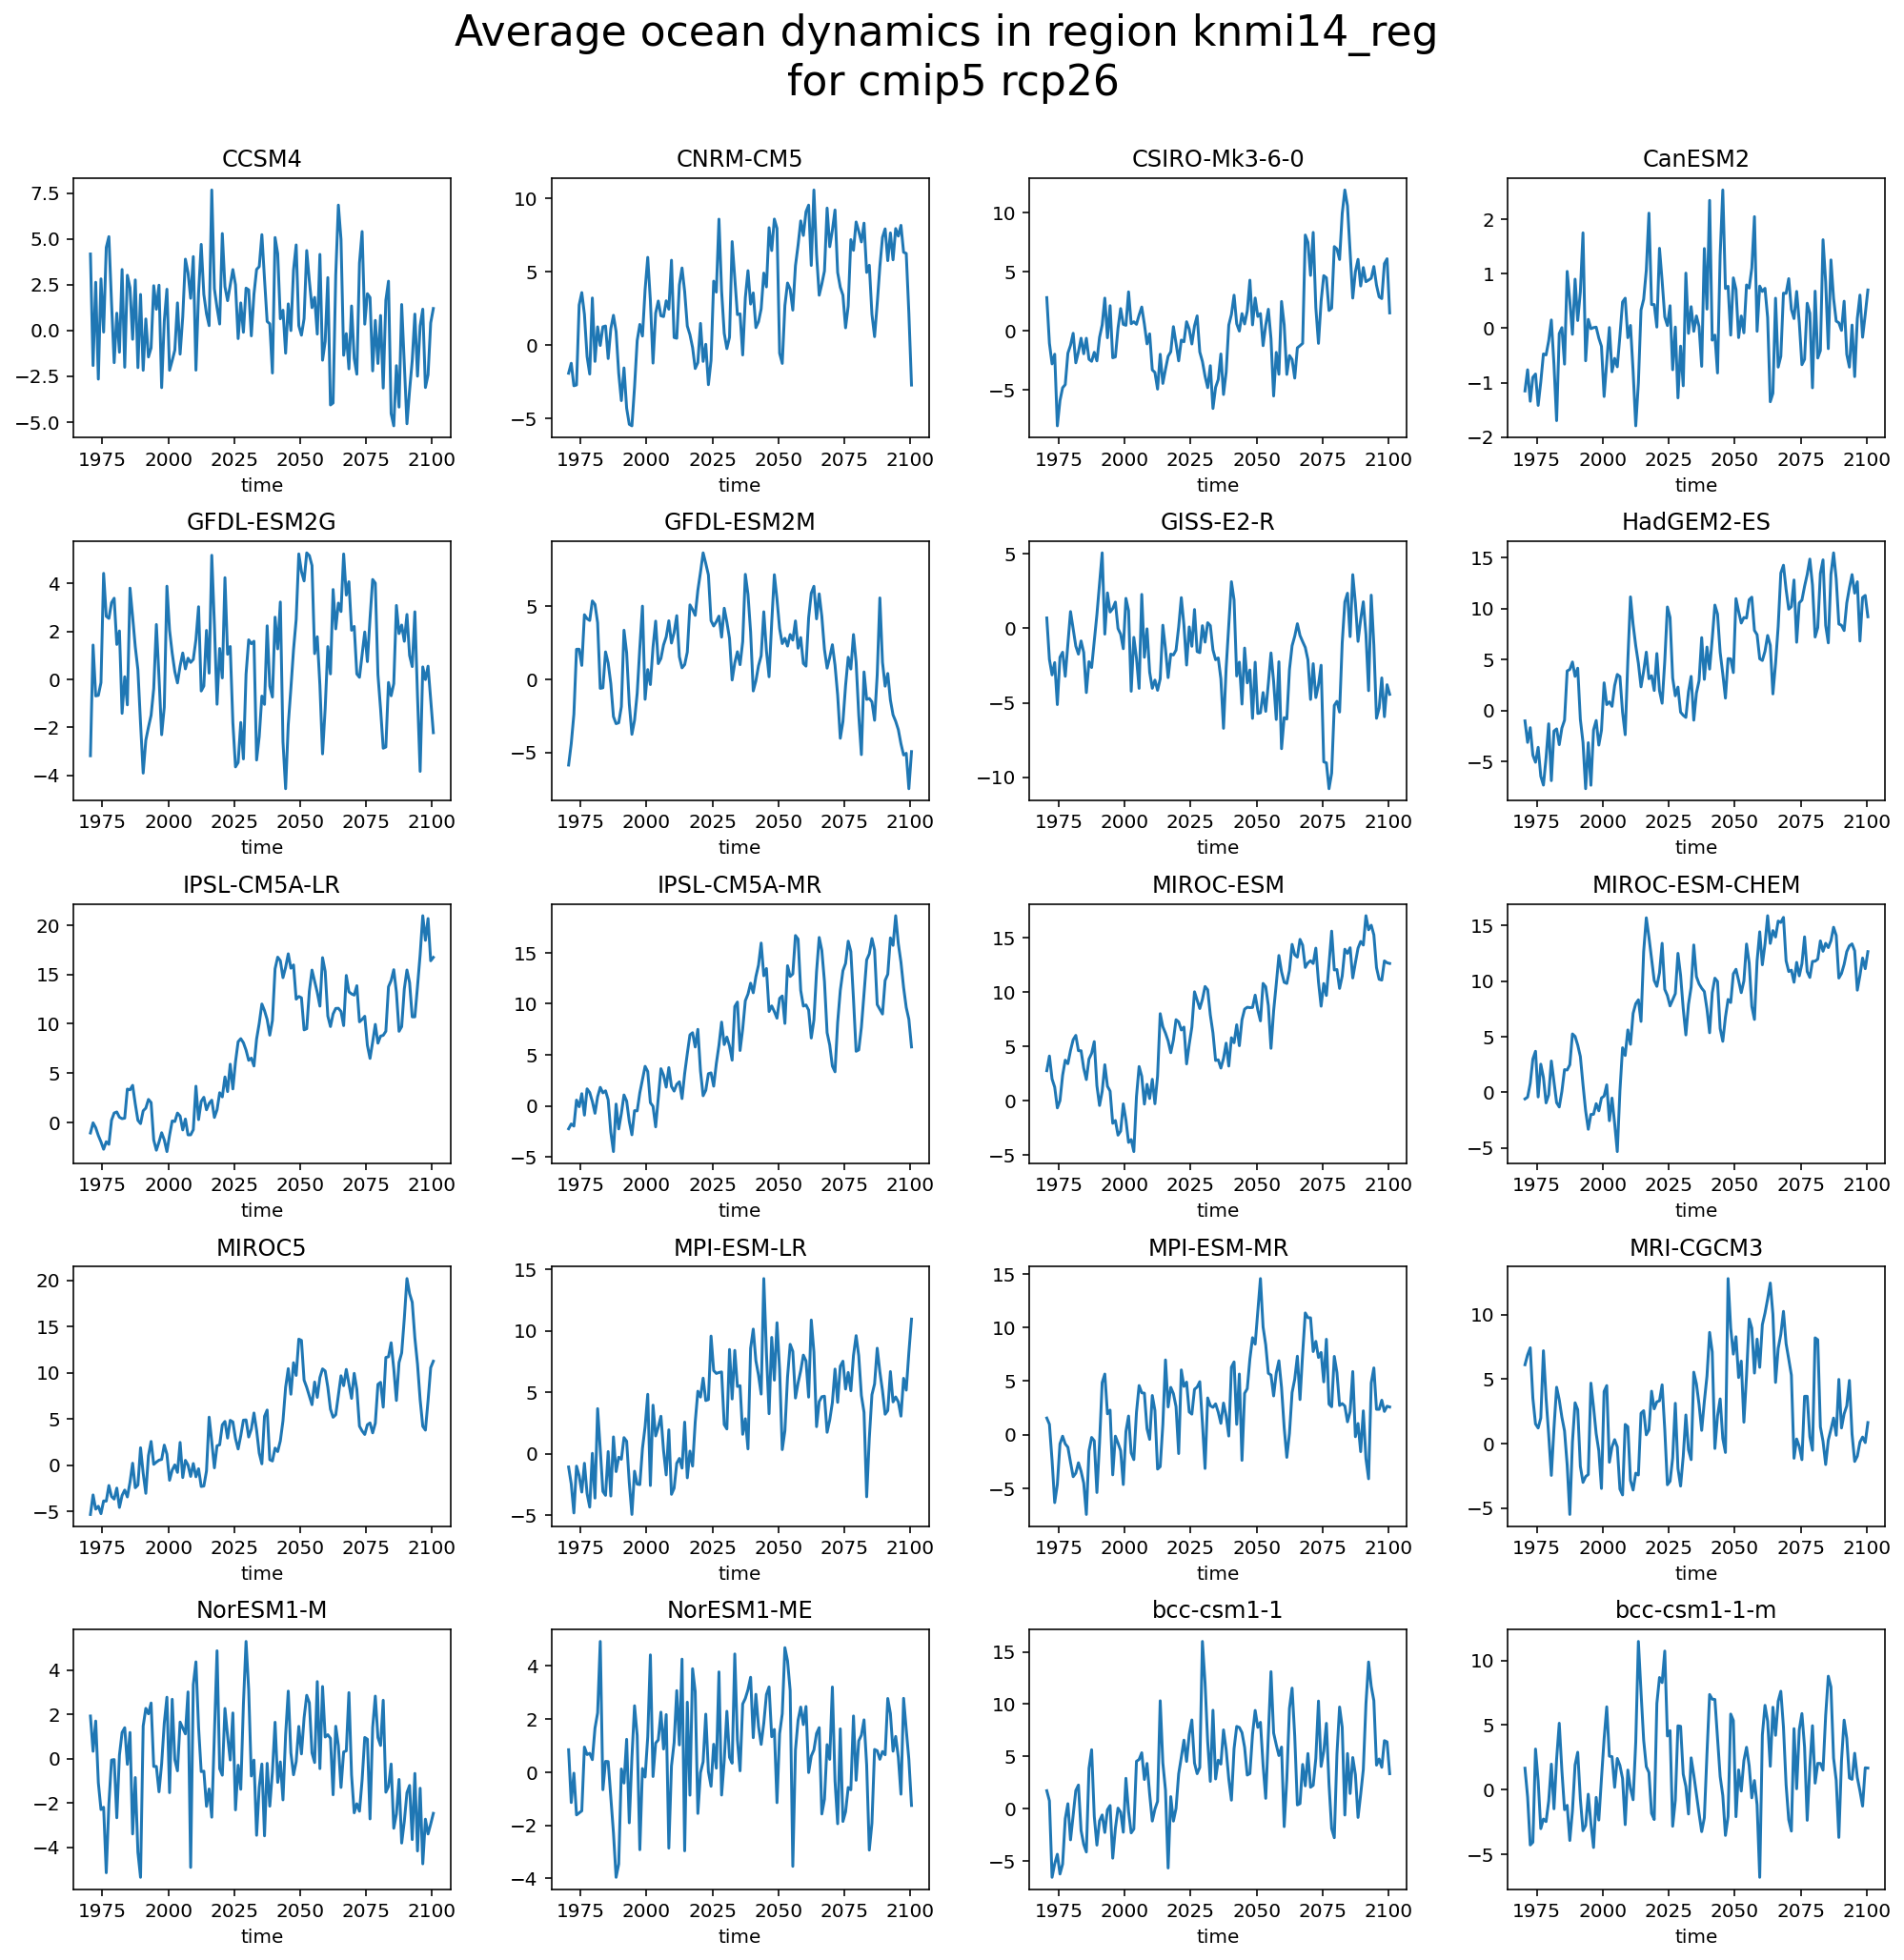

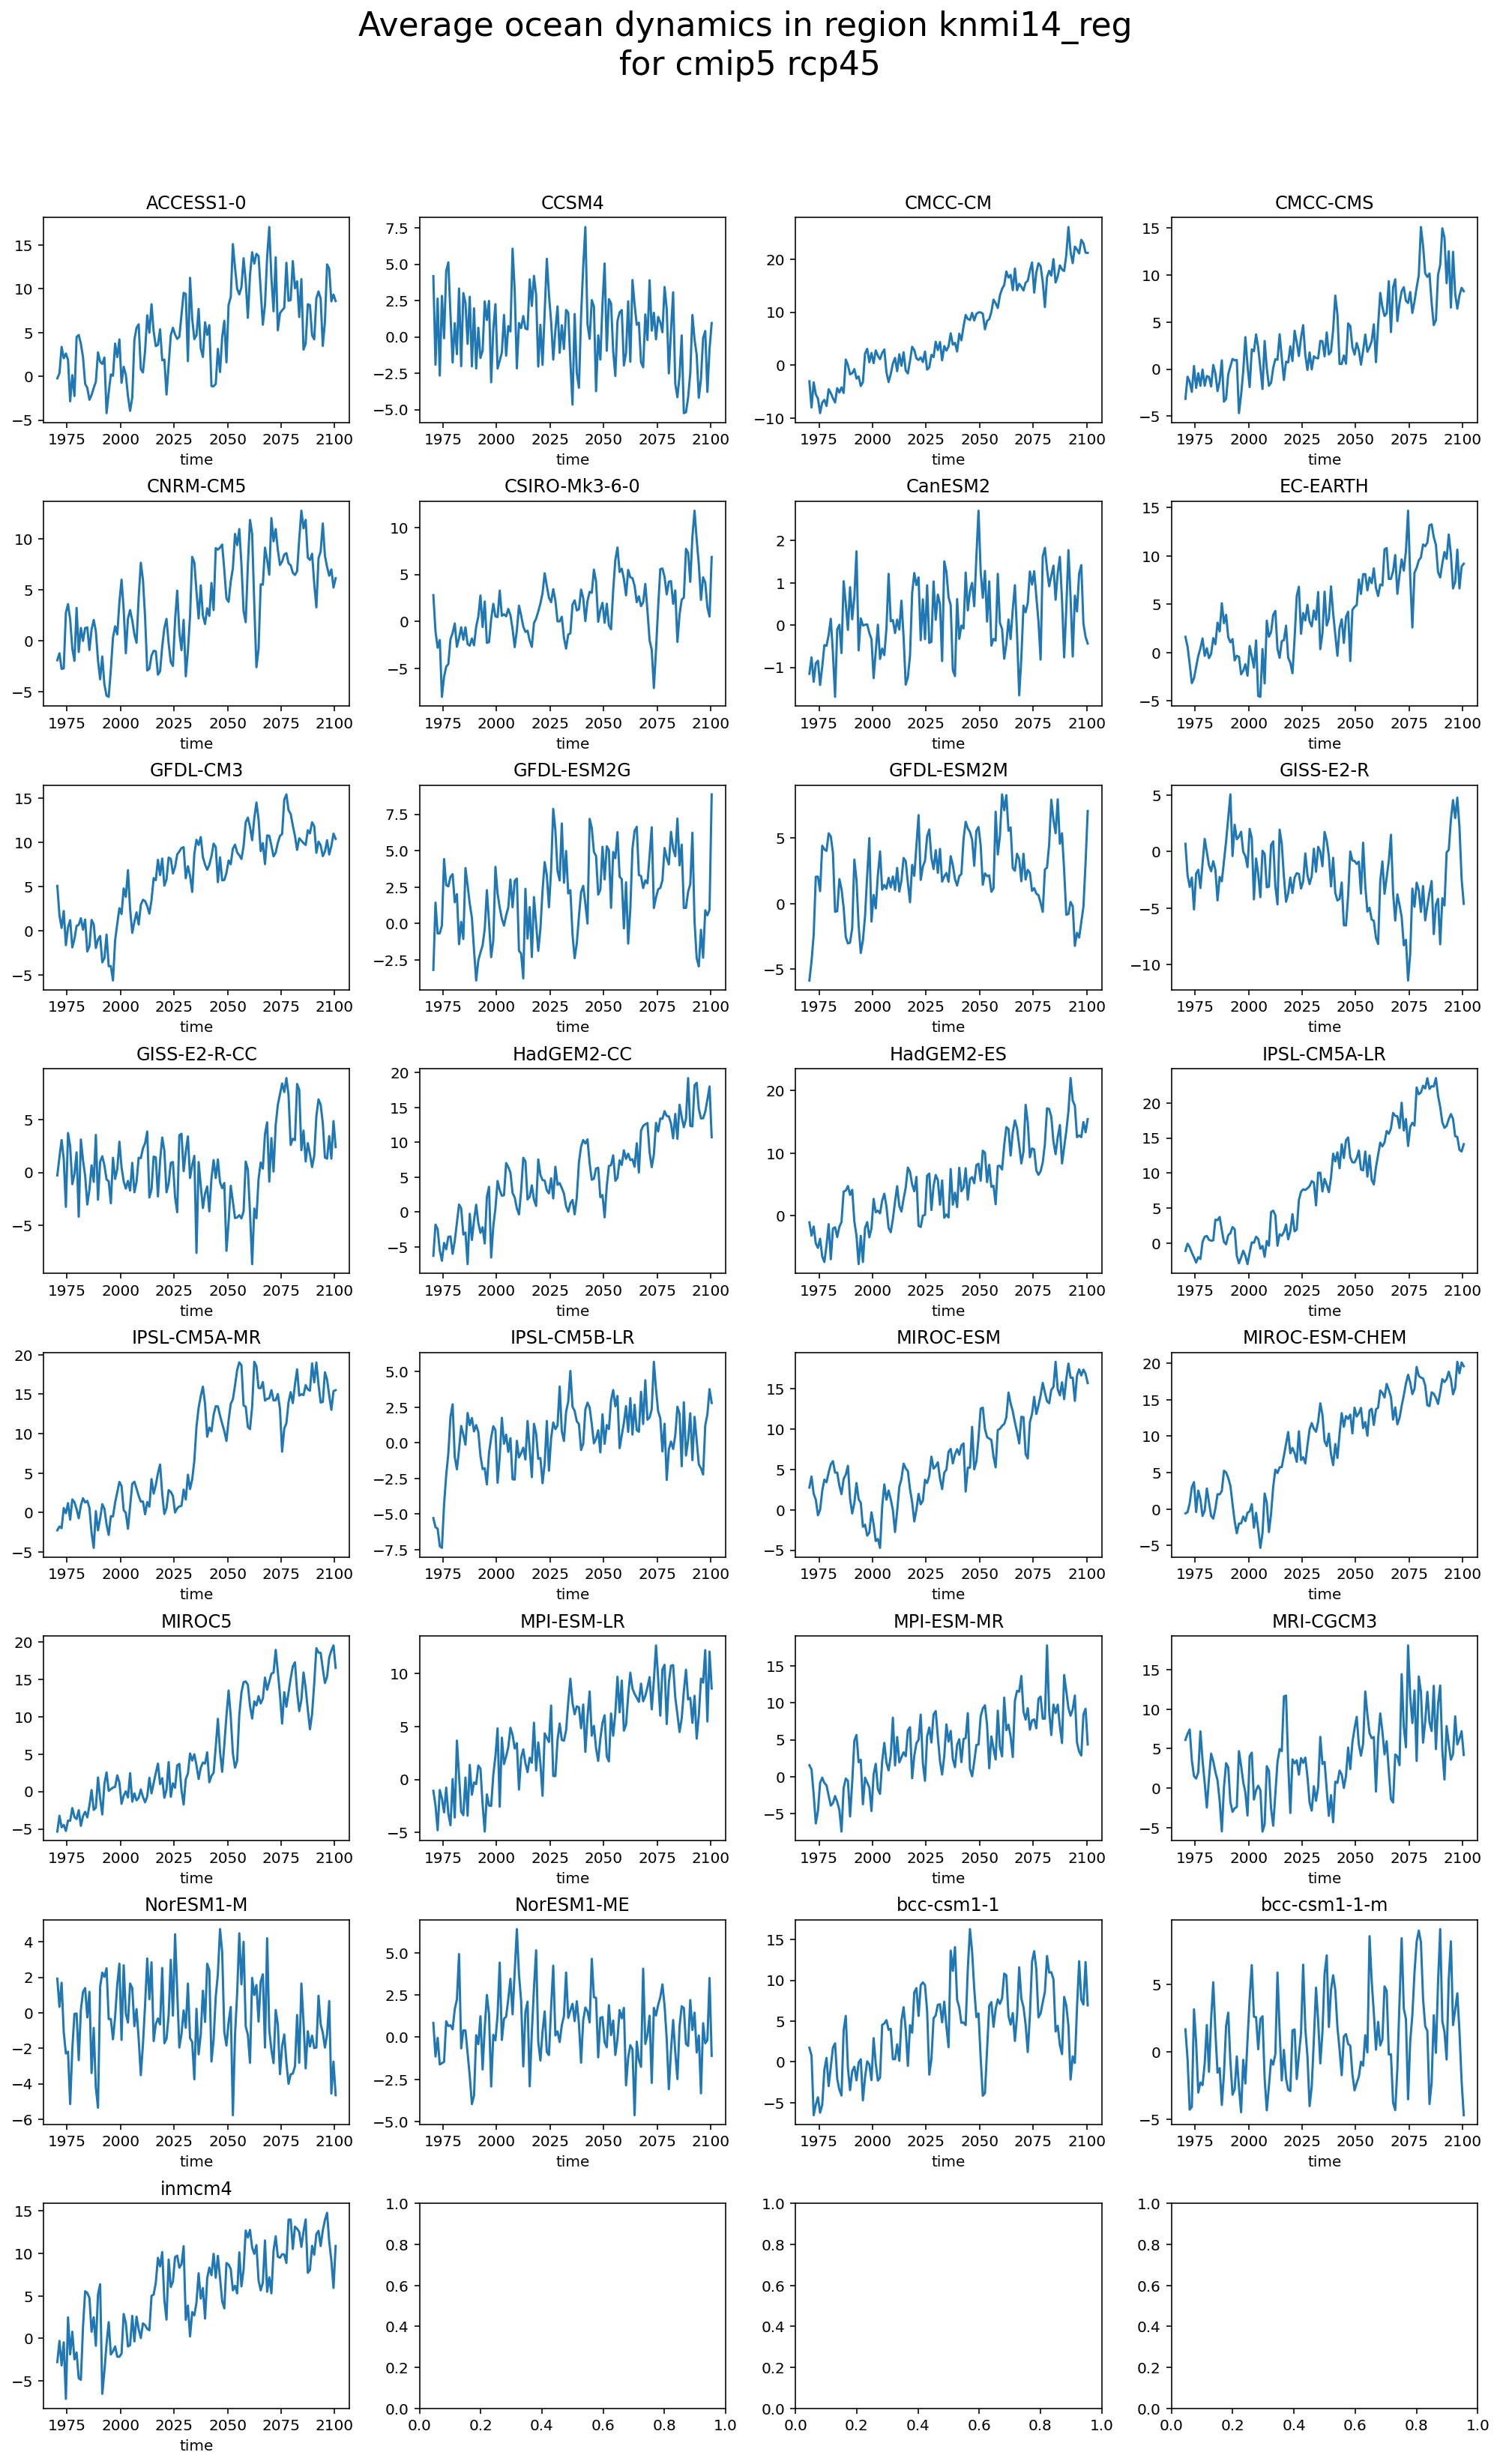

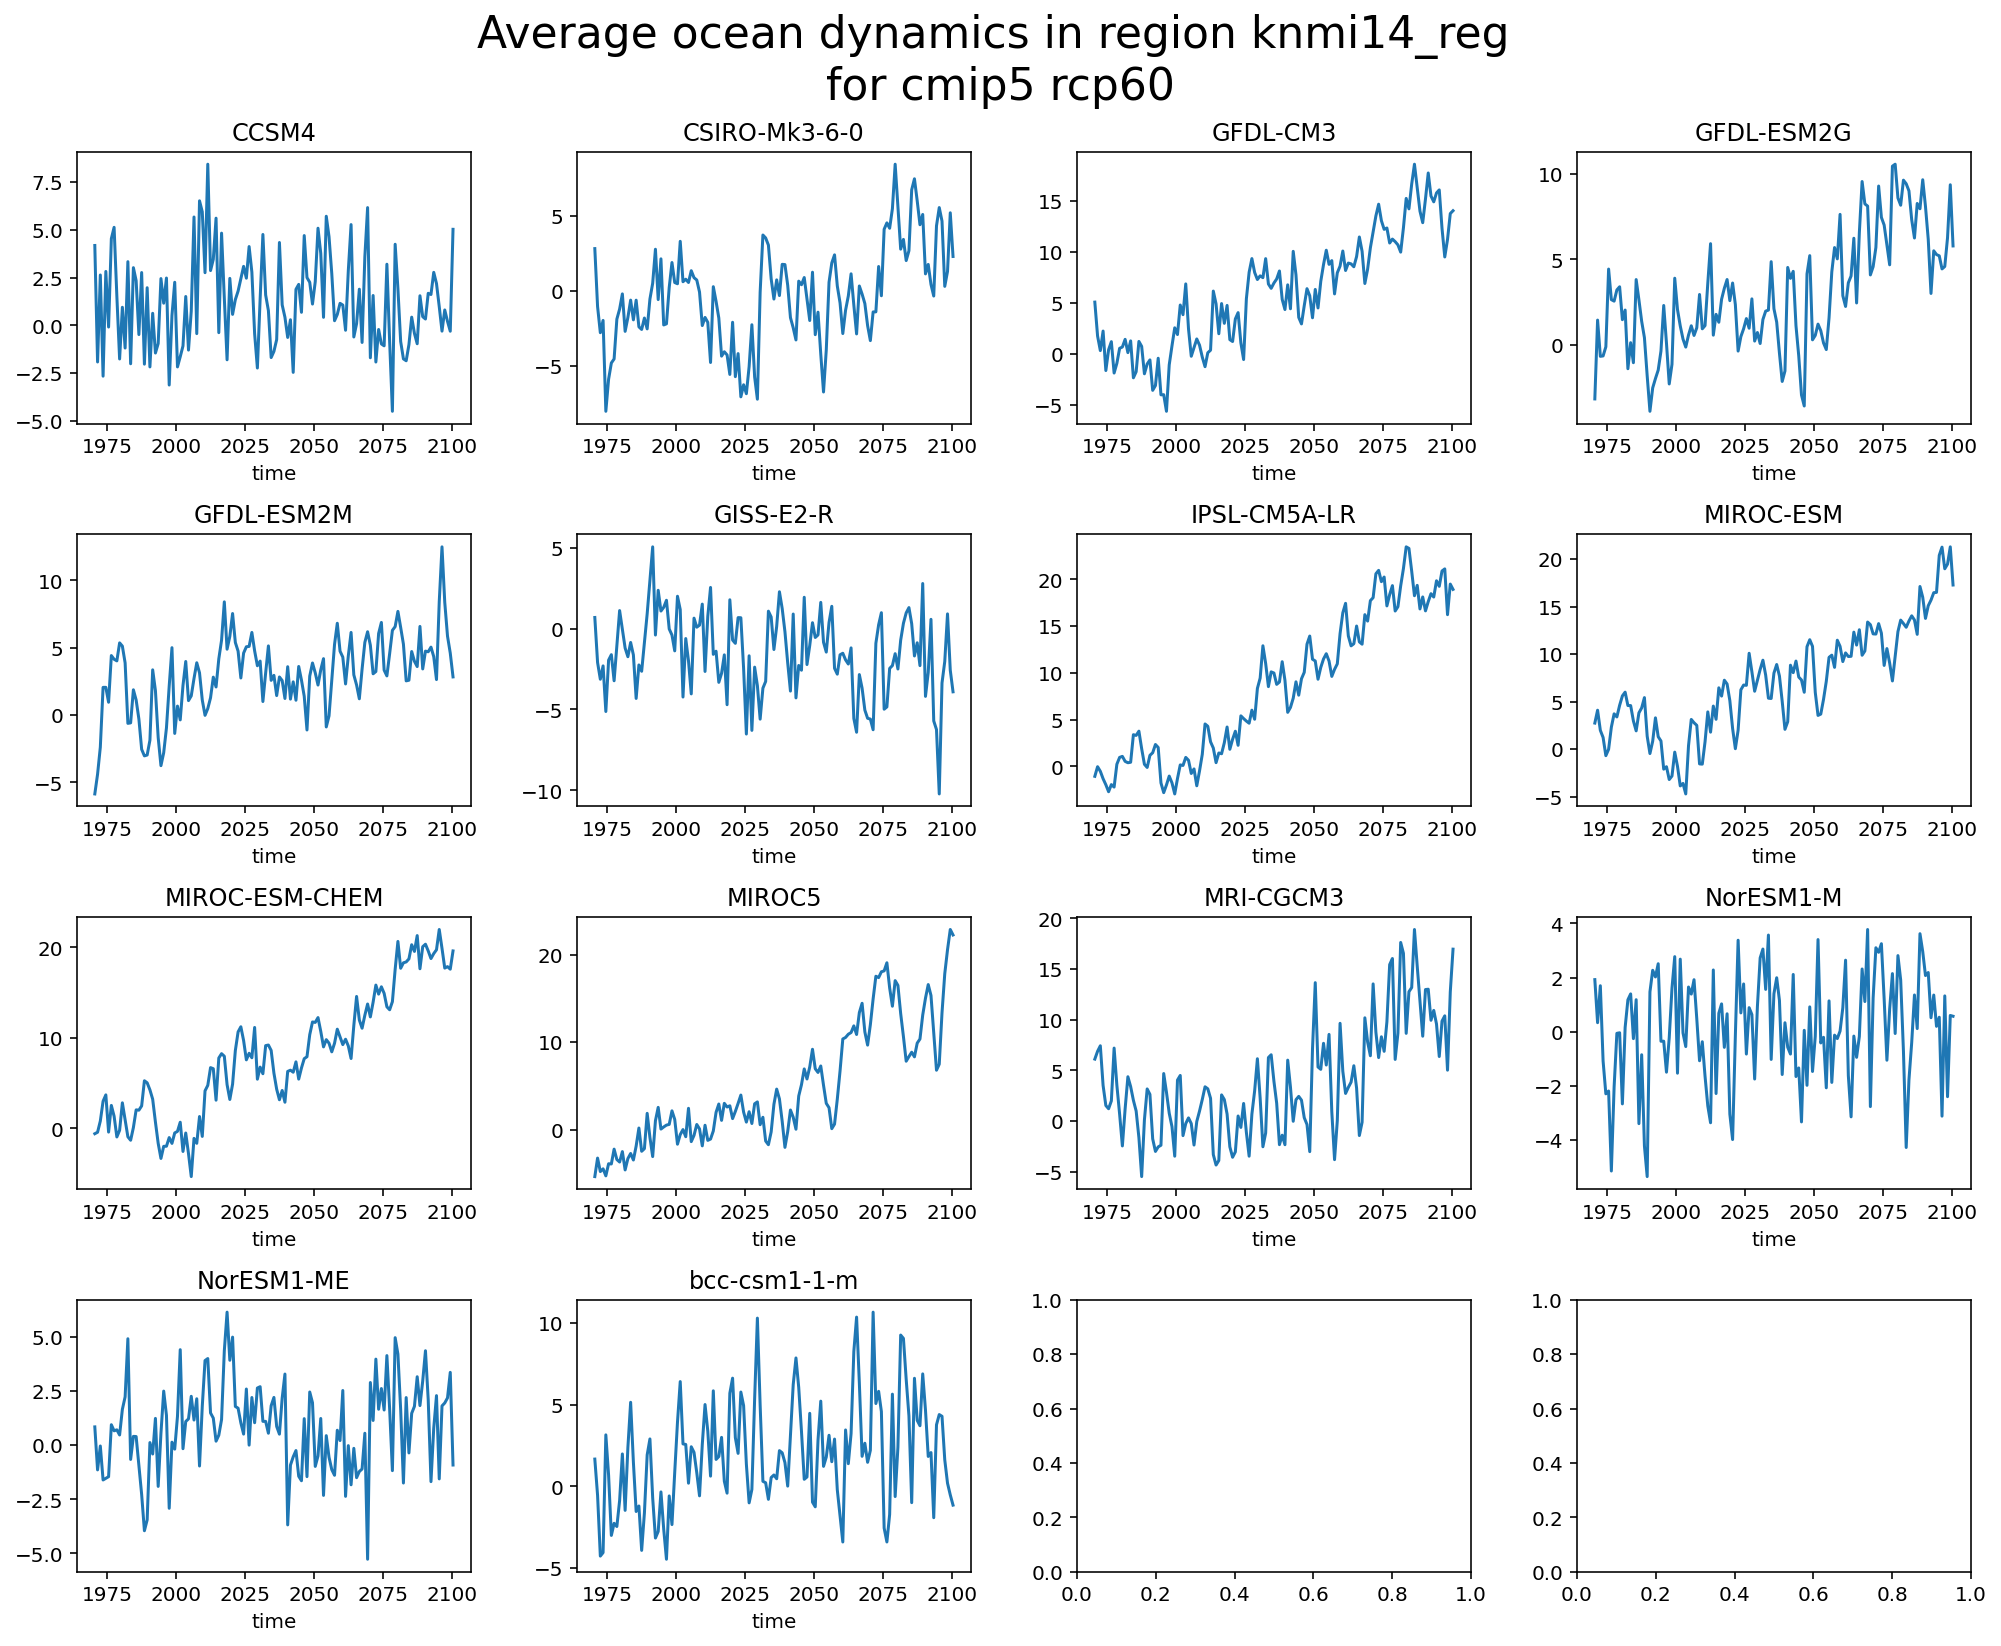

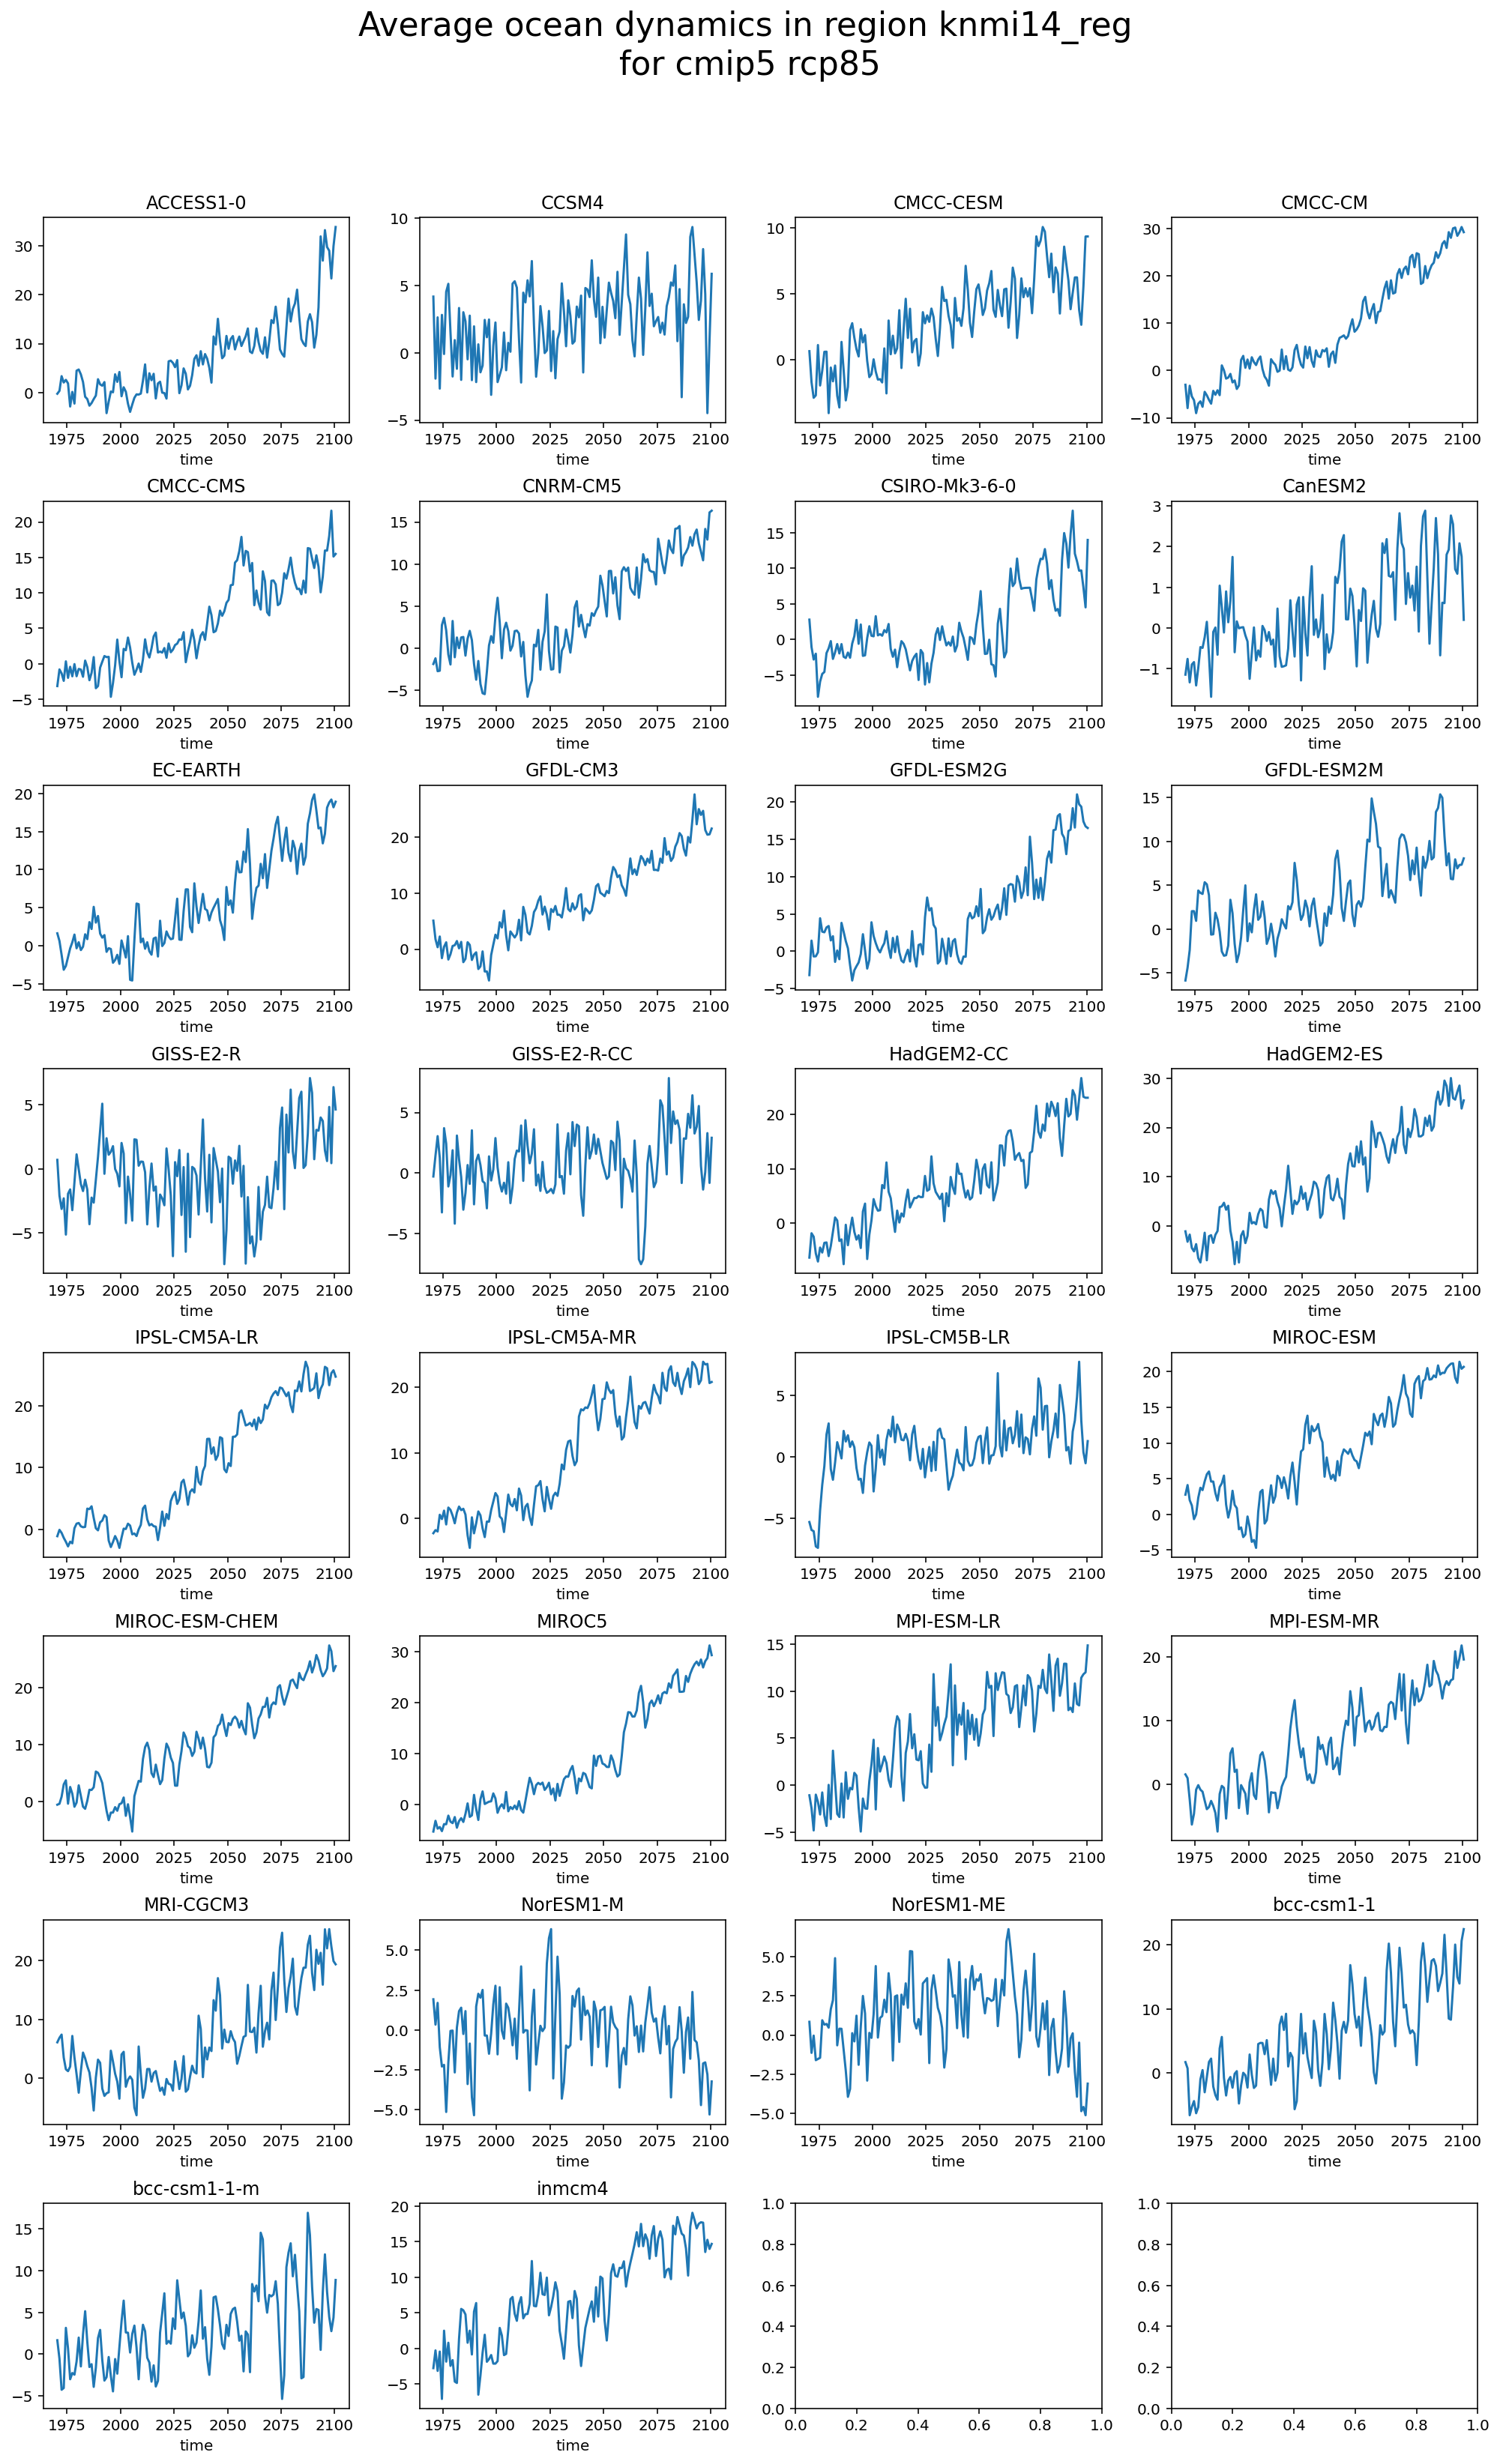

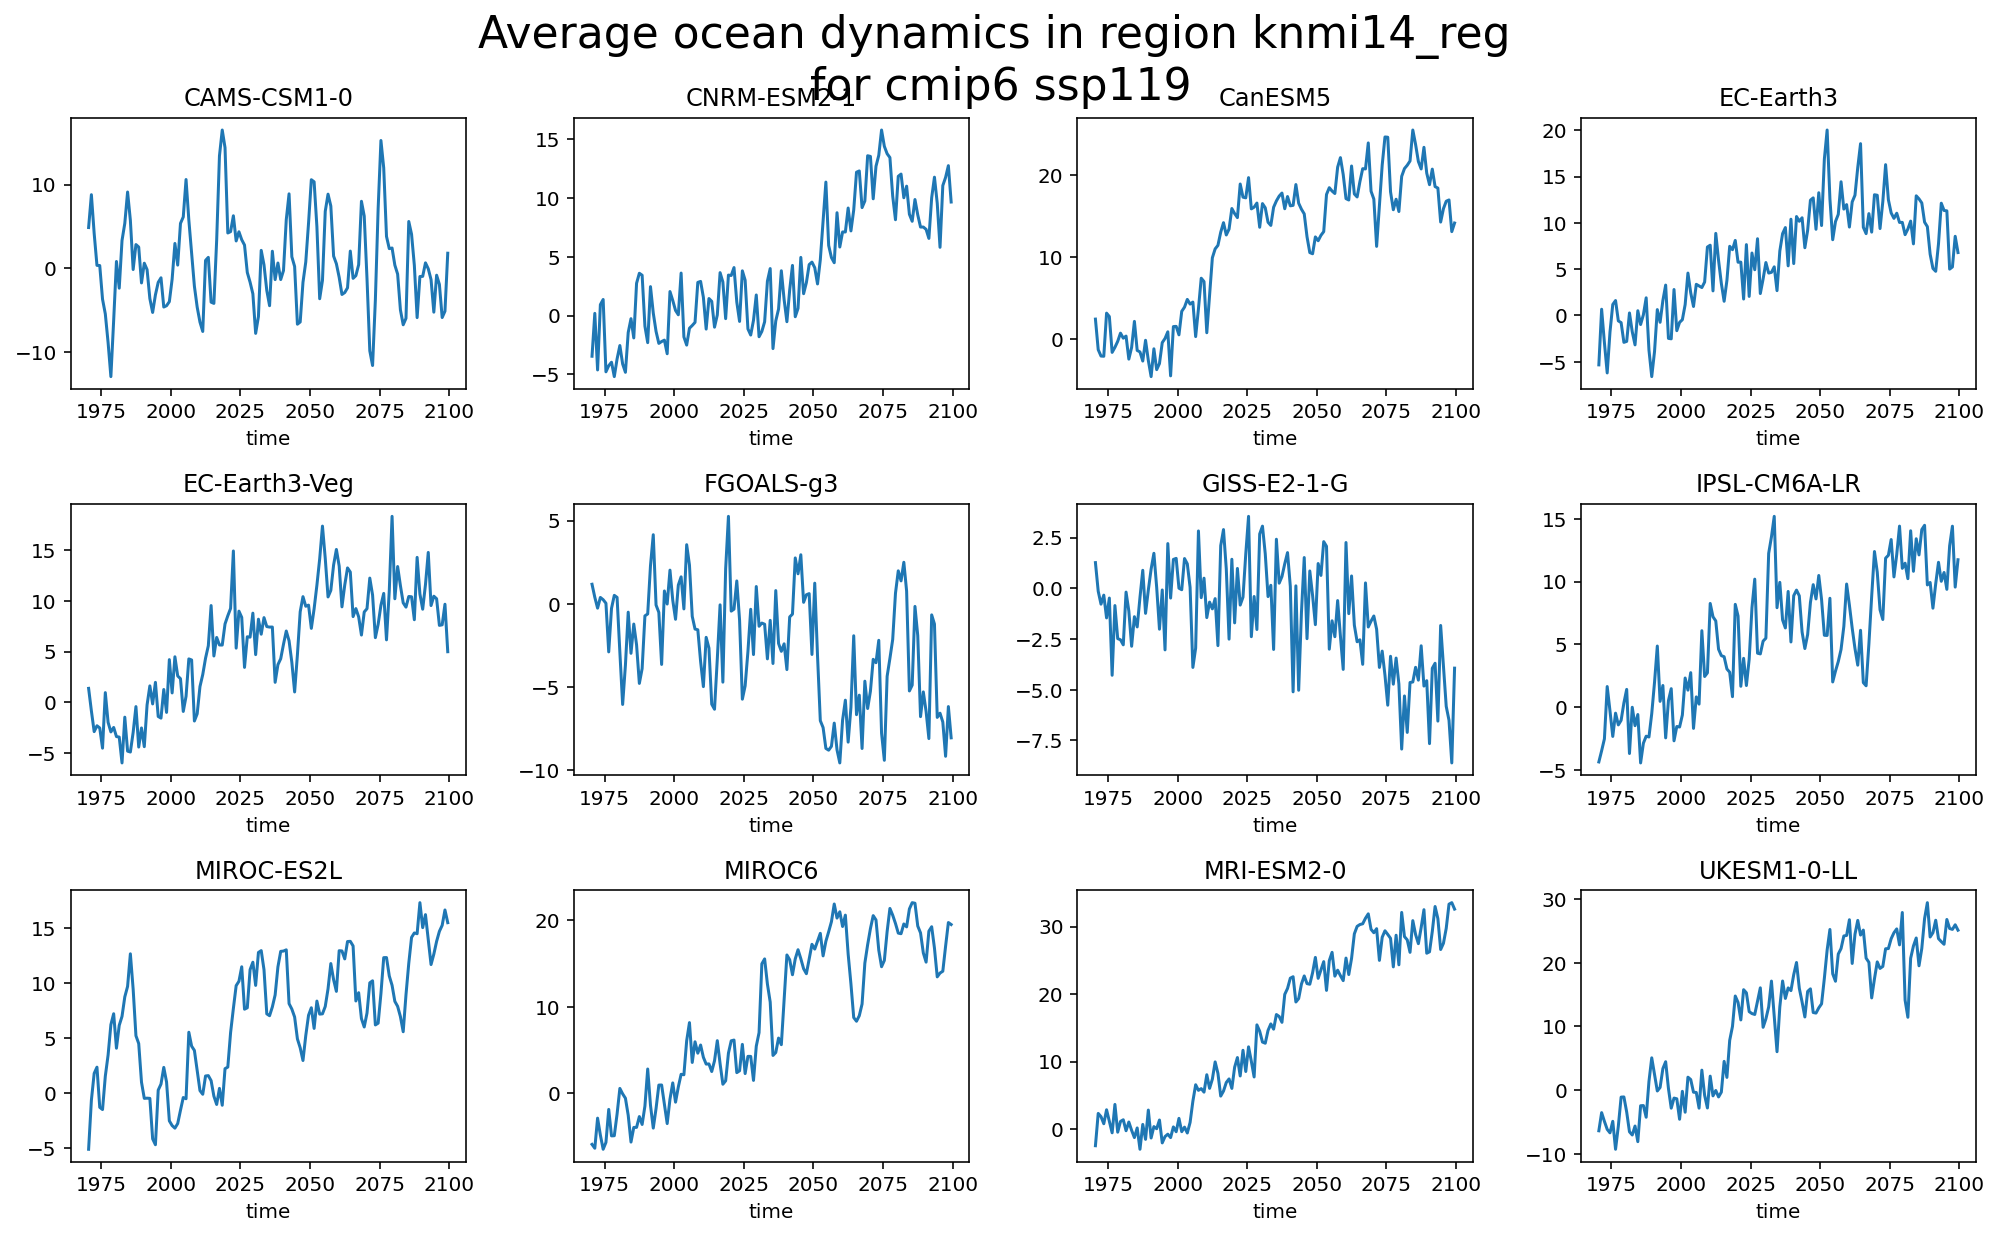

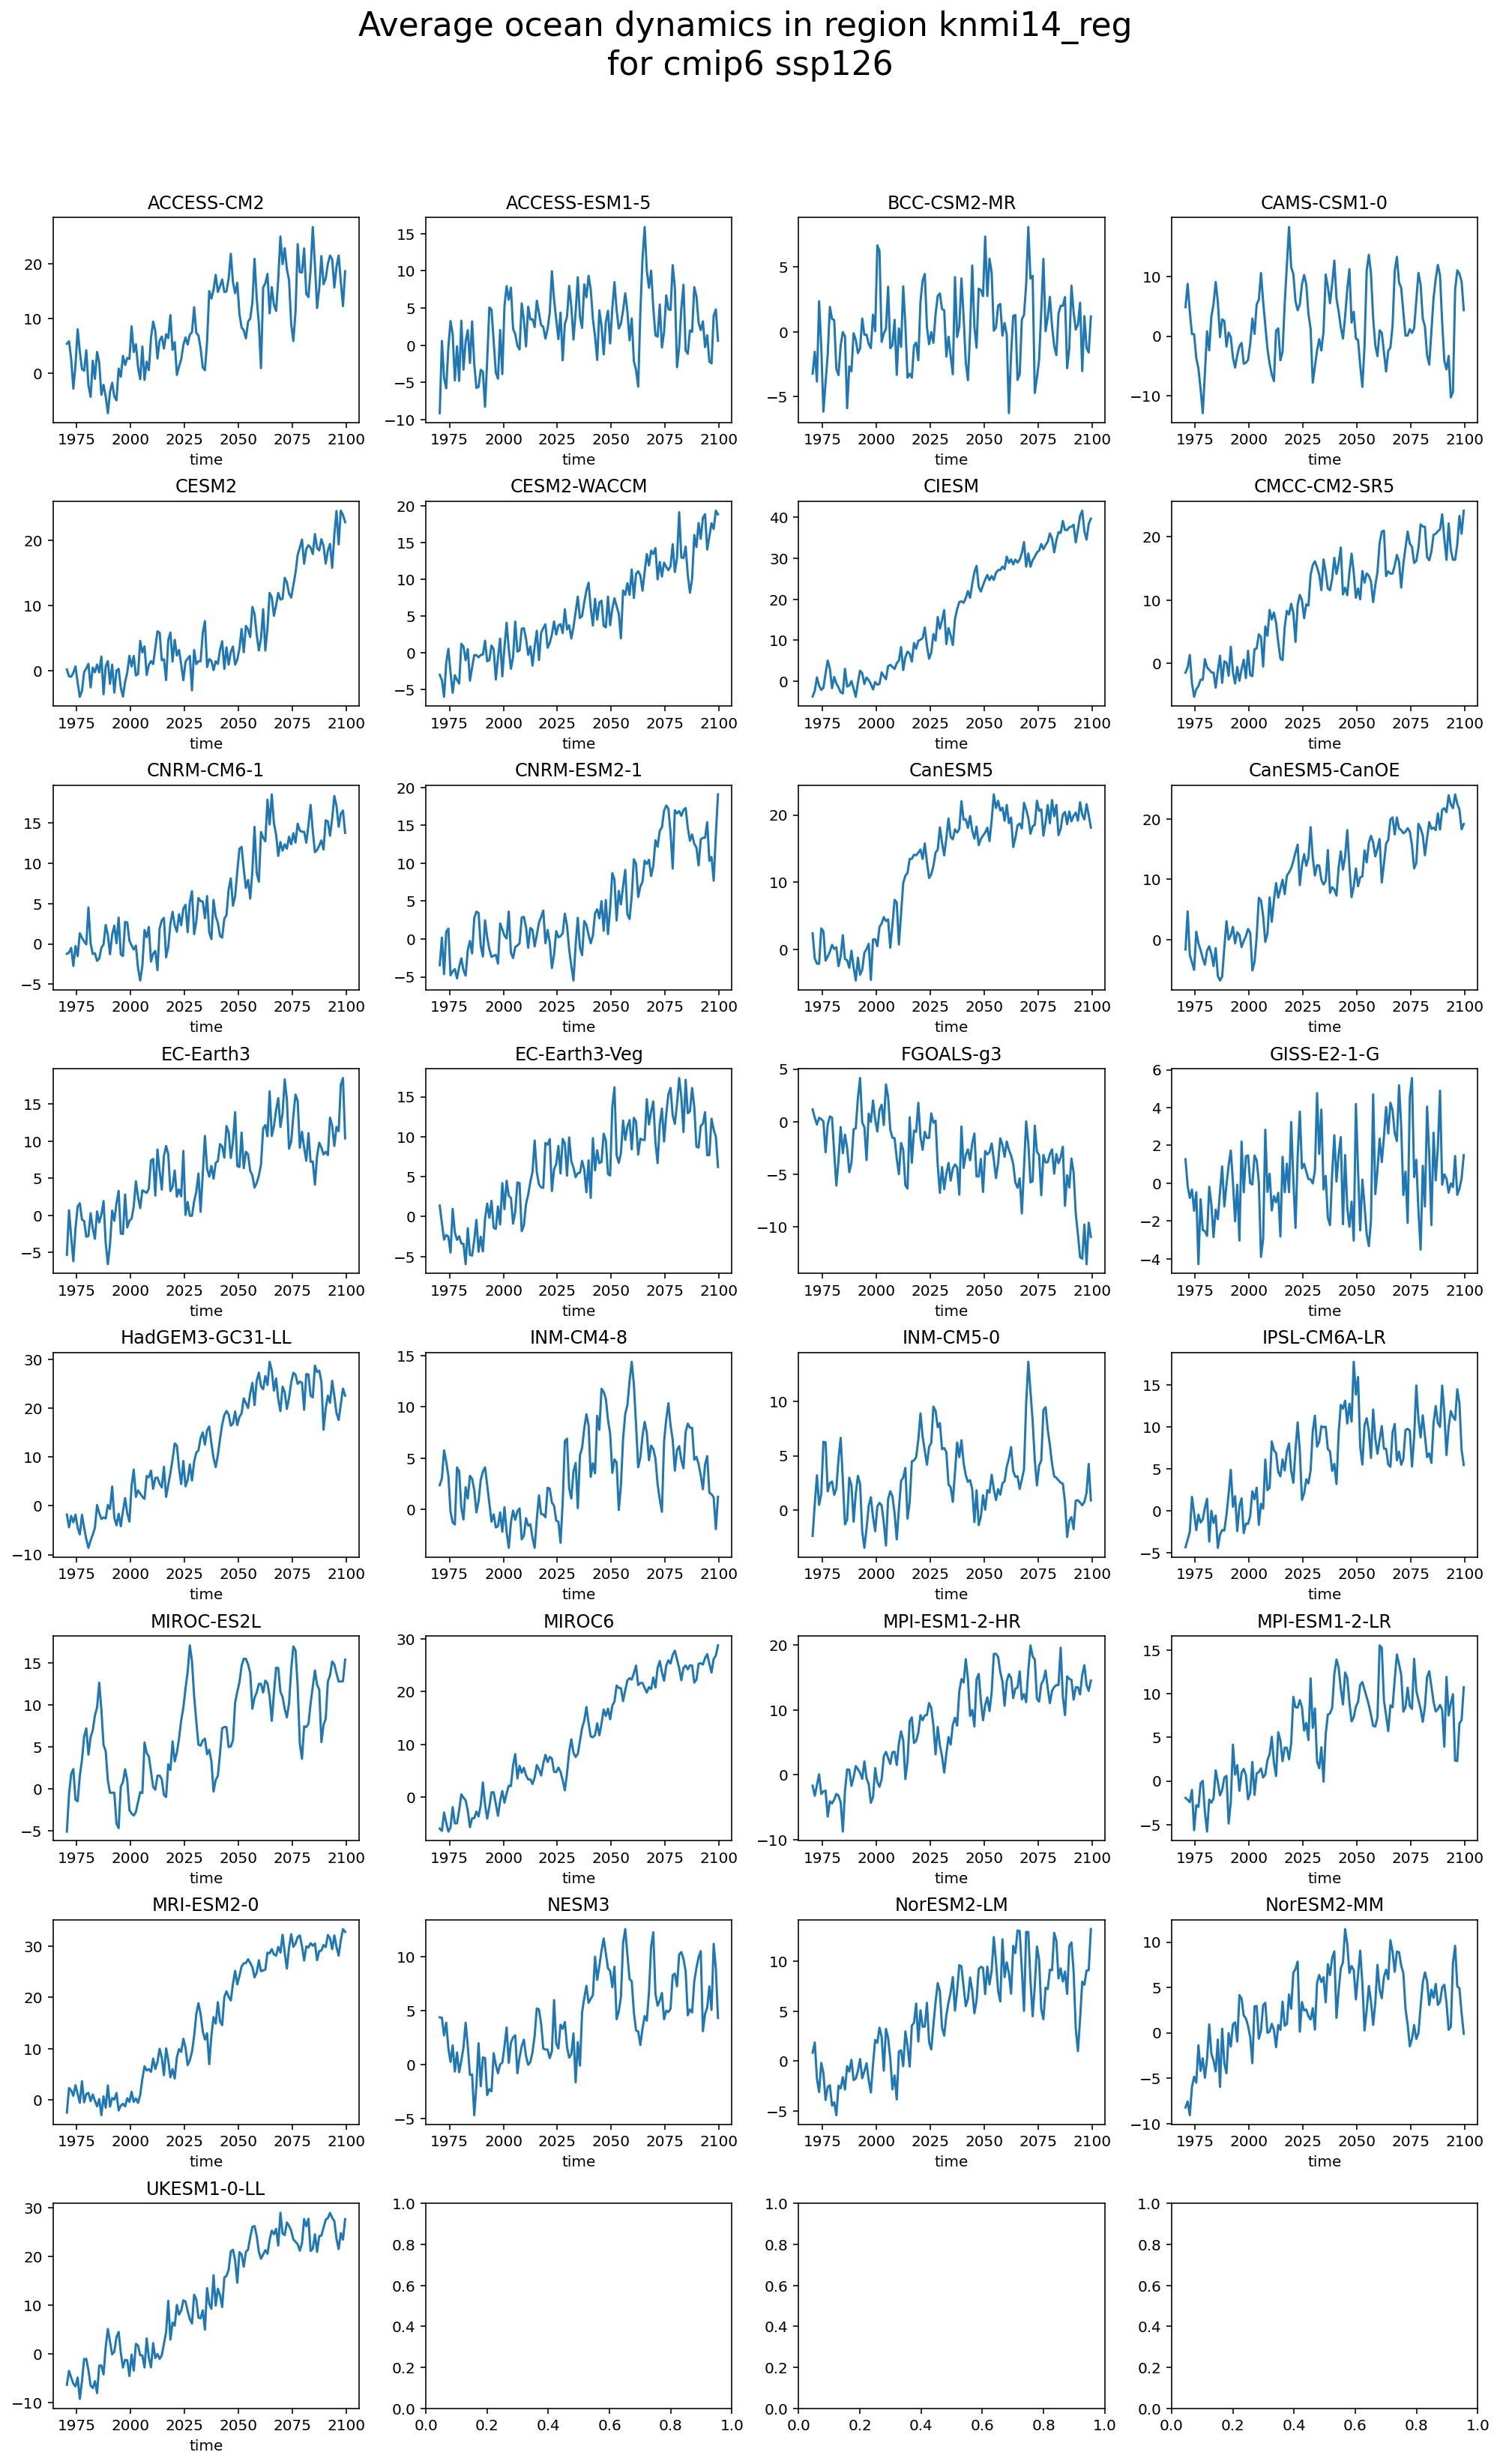

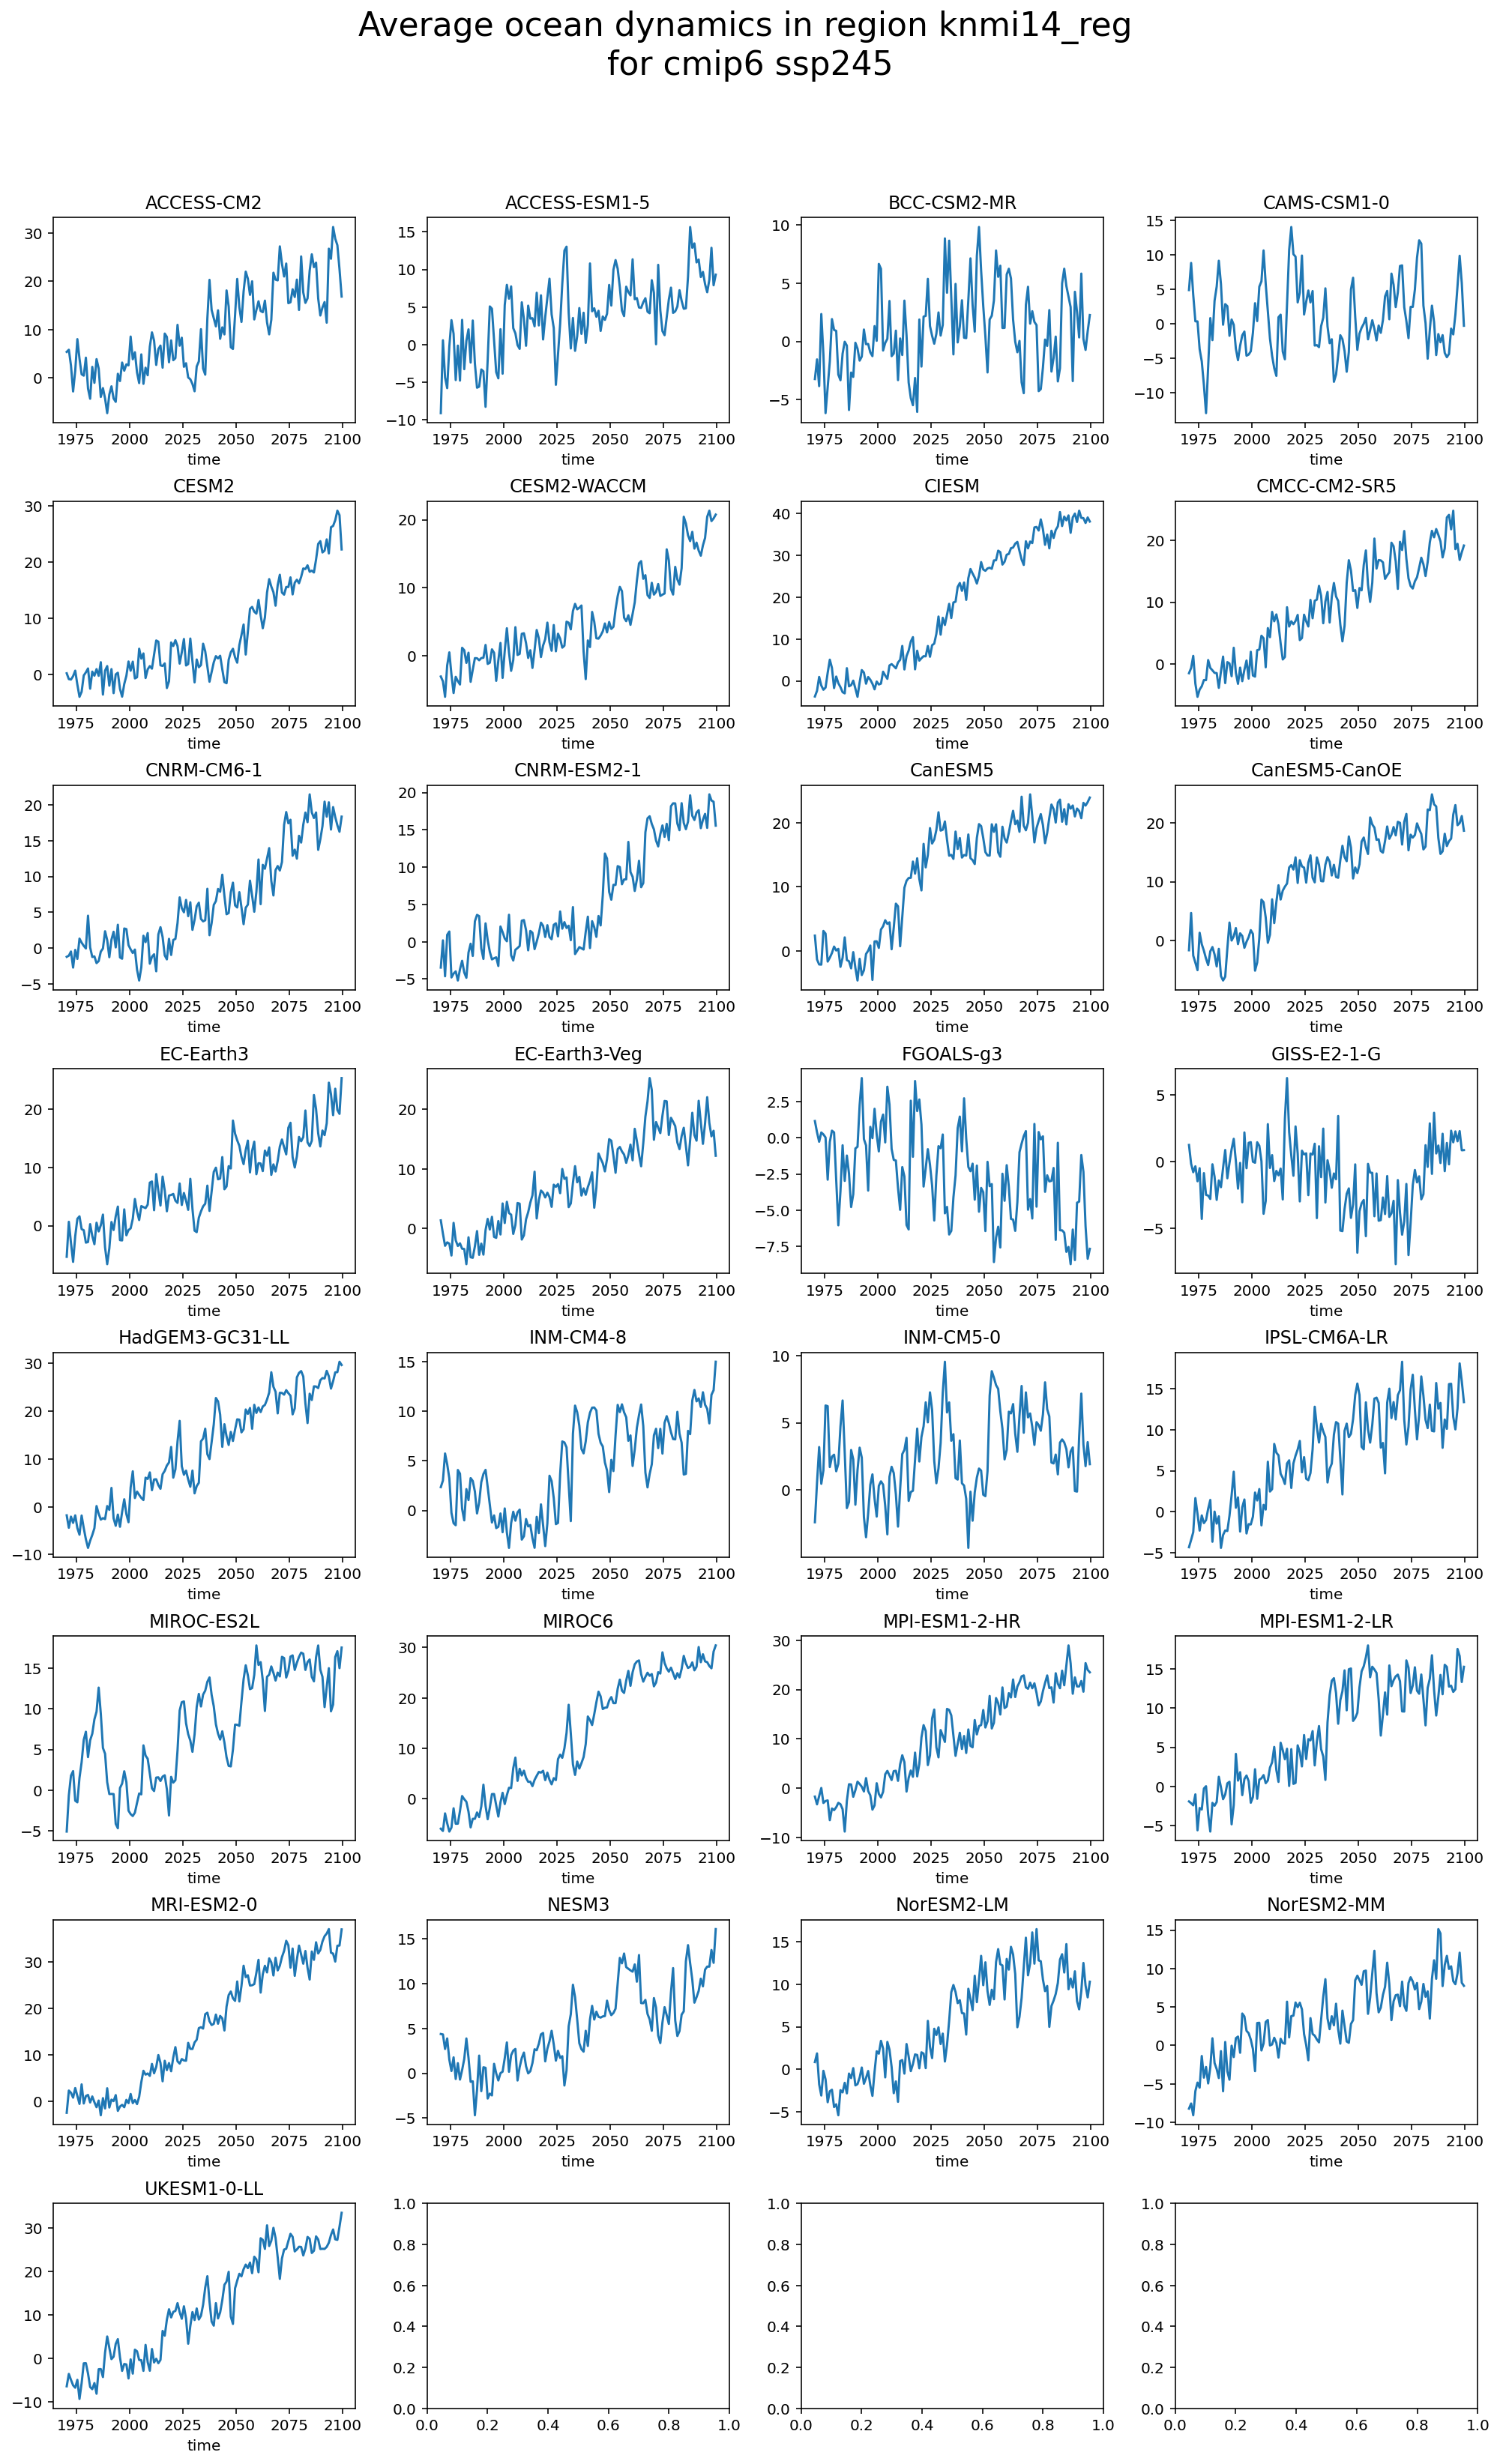

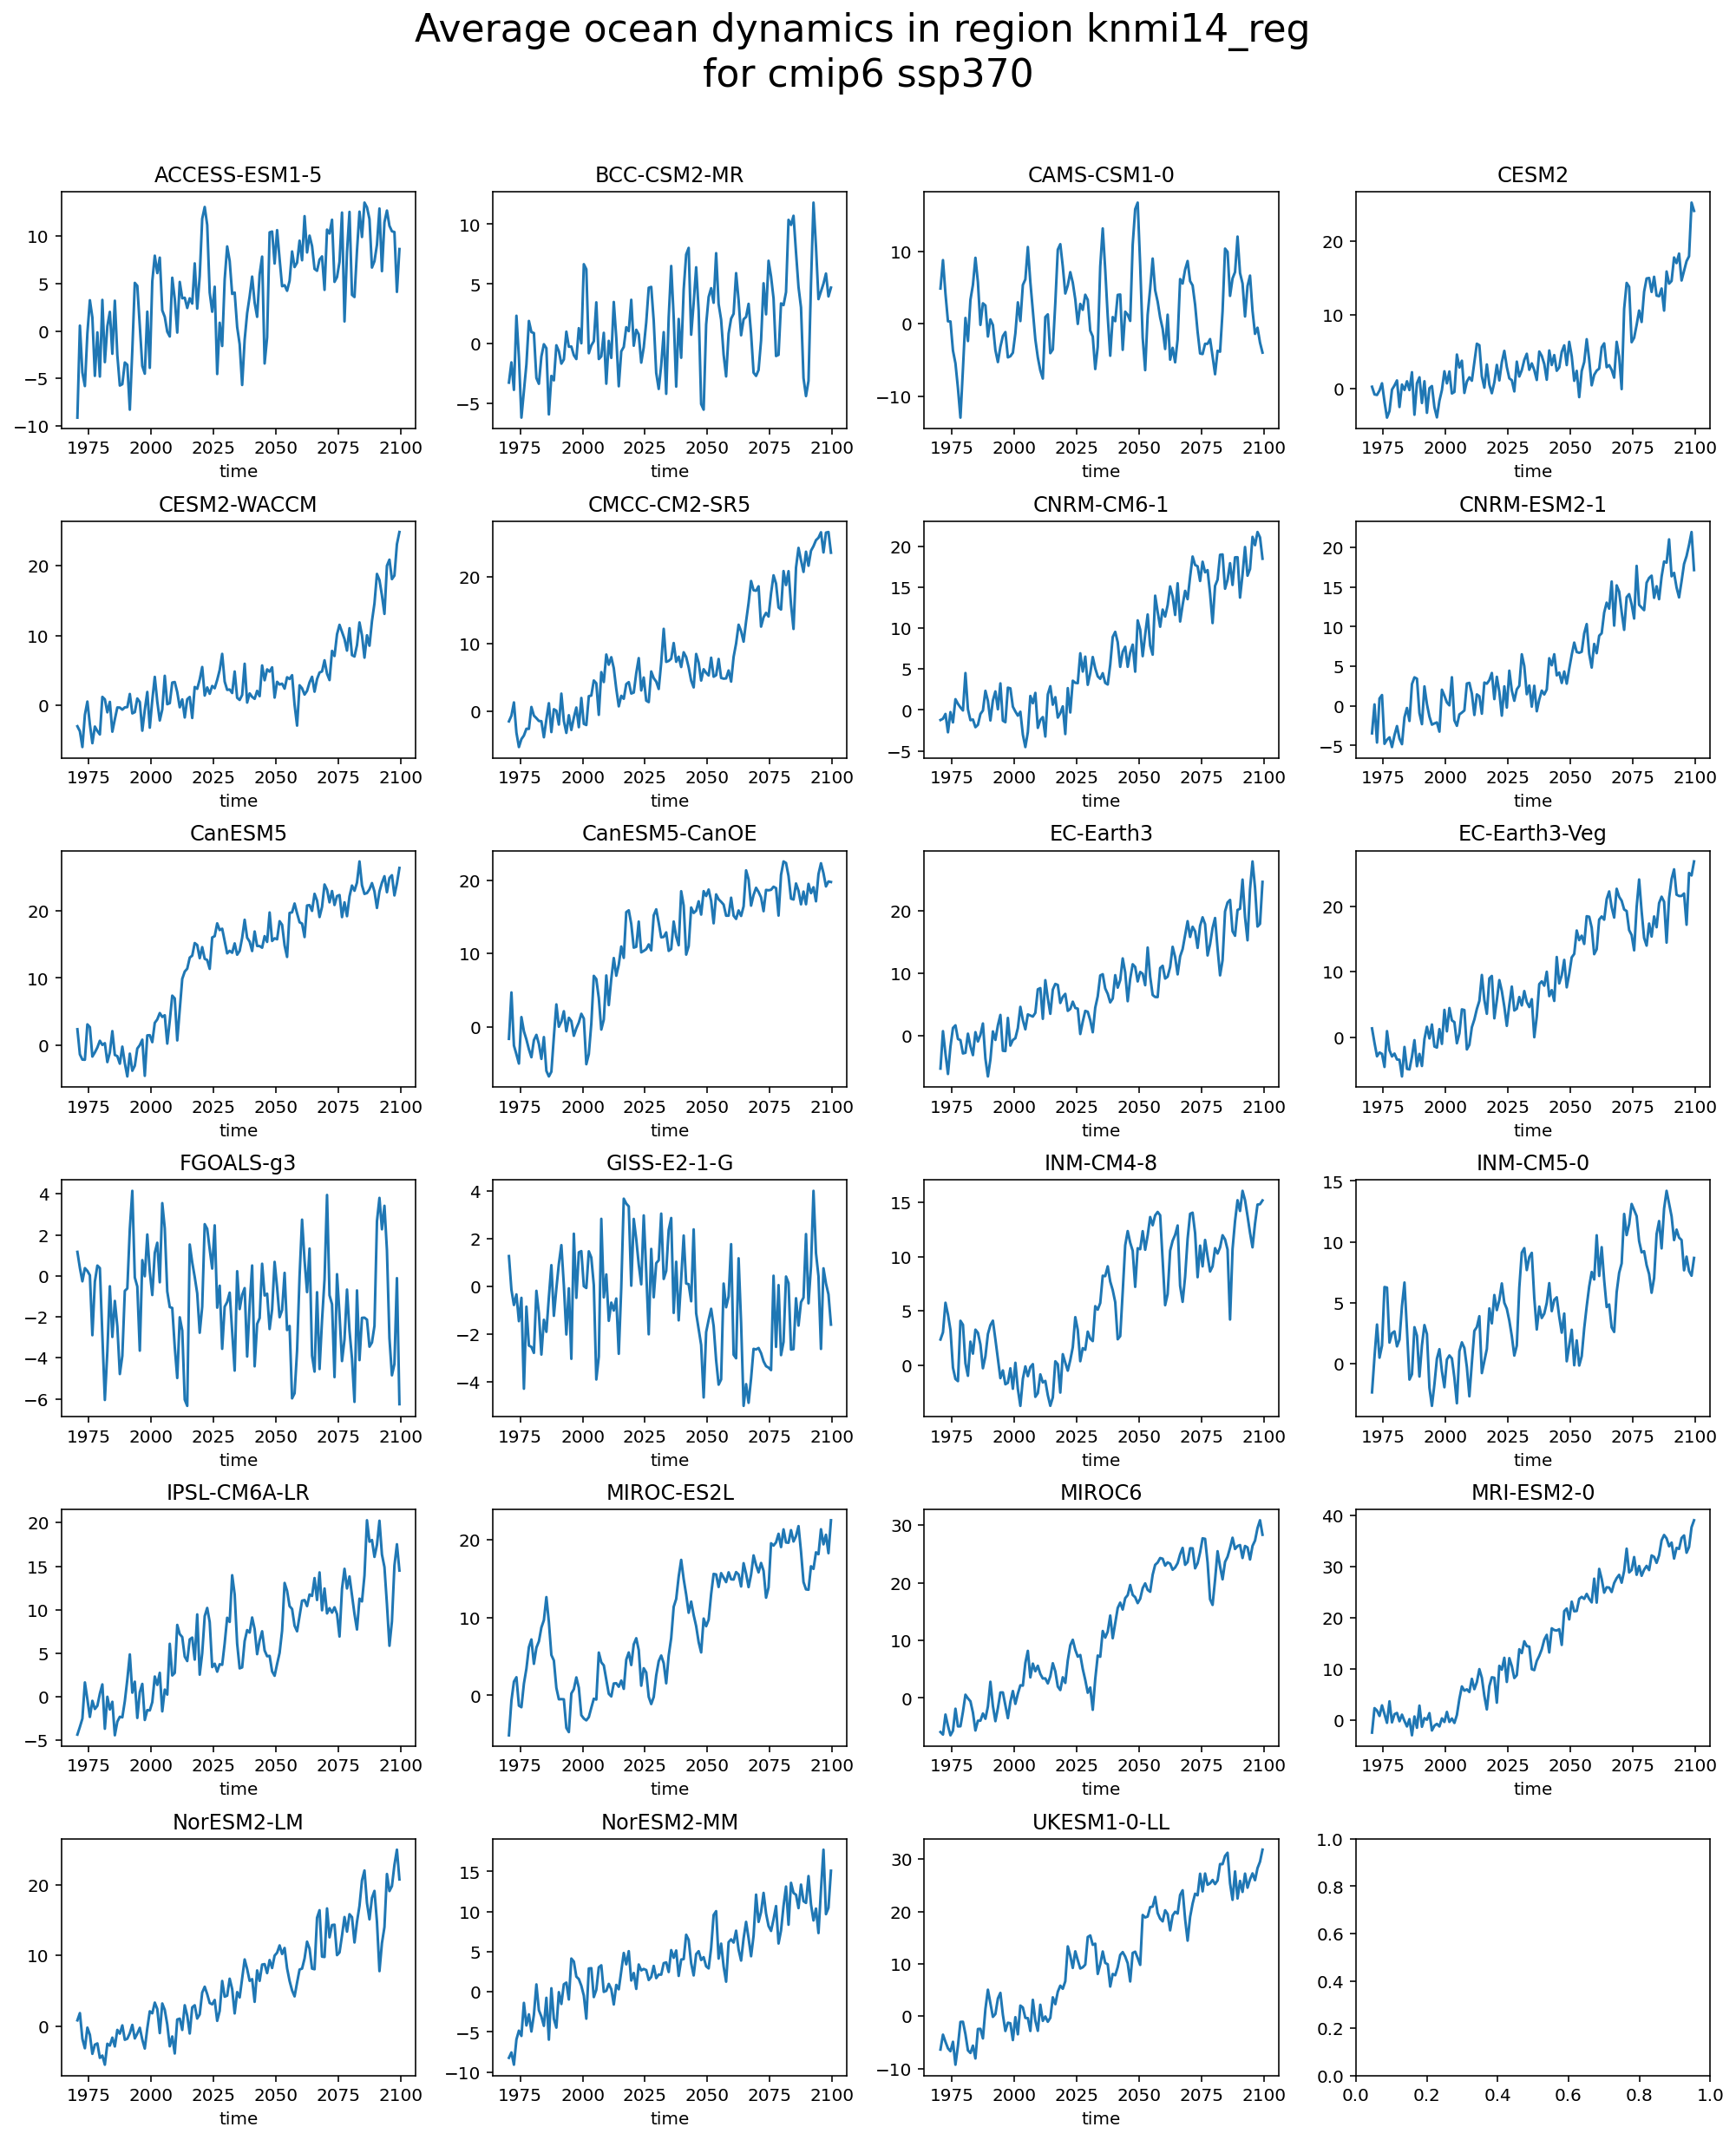

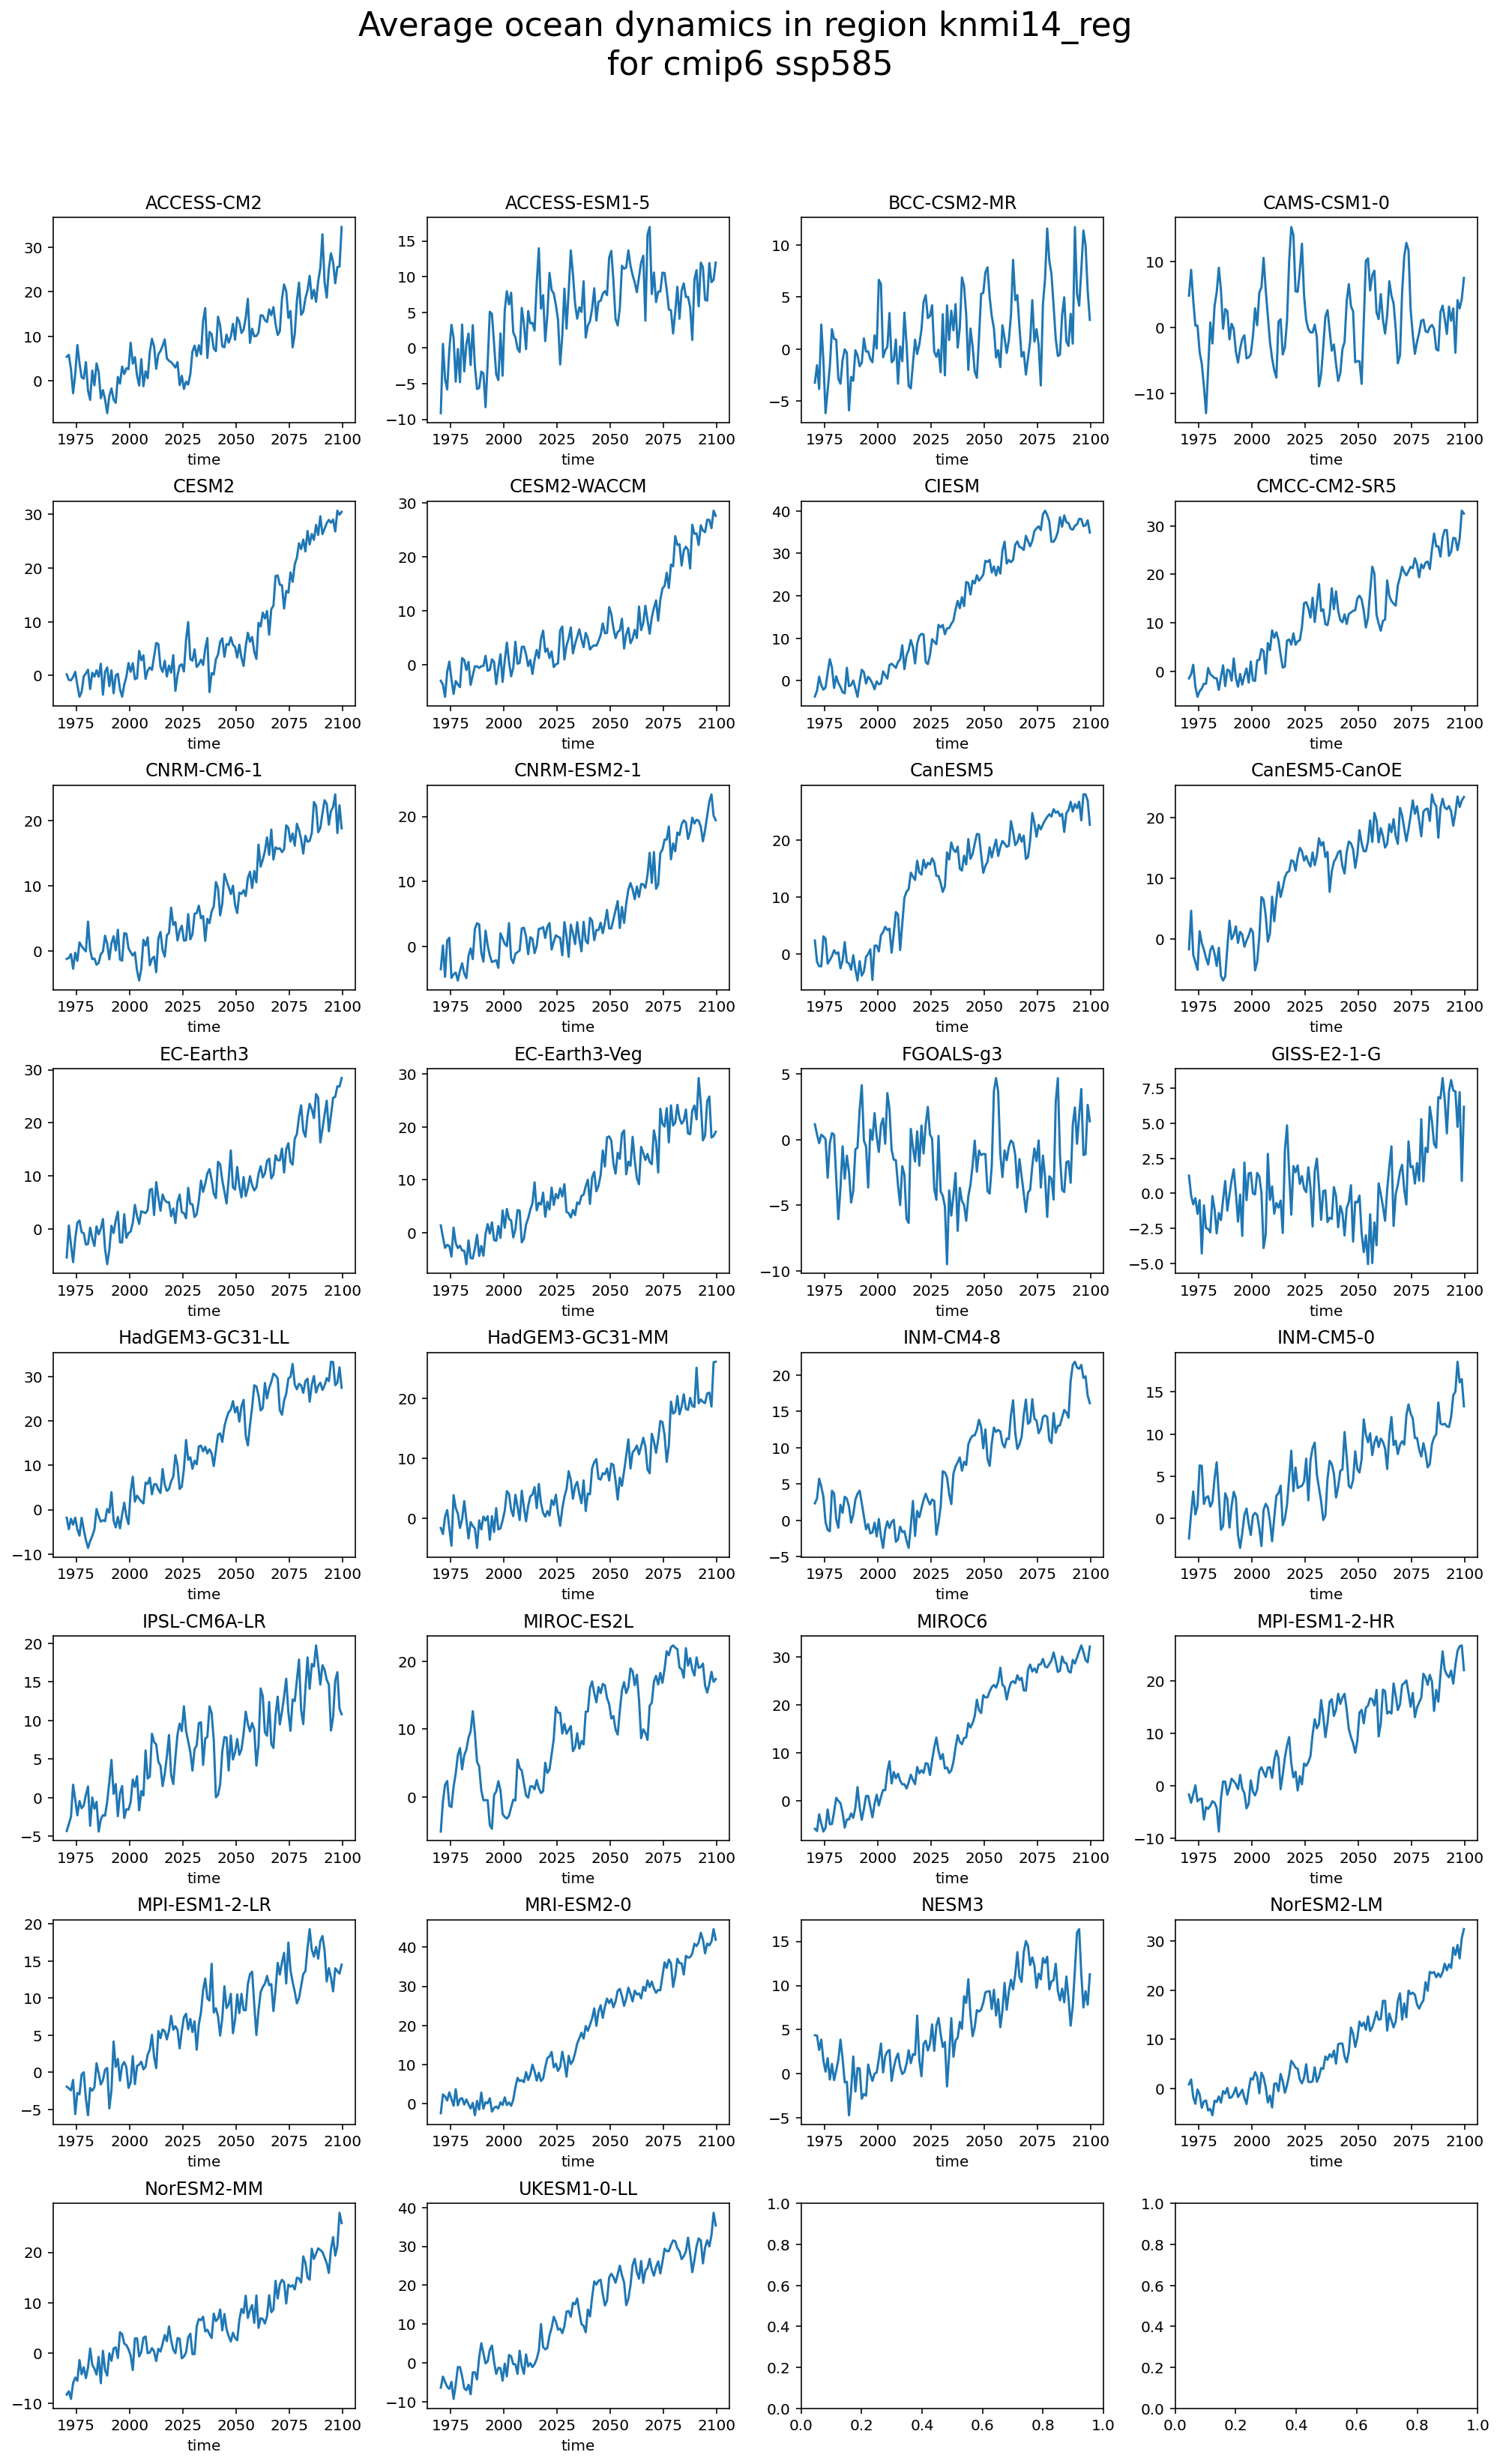

In [72]:
# Choose dates and region
start_year = 1970 #2006
end_year = 2101
reg = 'knmi14_reg'

lon_min, lon_max, lat_min, lat_max = pp.define_area(reg)

list_sce = ['rcp26', 'rcp45', 'rcp60','rcp85',
            'ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

mip_dic = {'rcp26':'cmip5', 
           'rcp45':'cmip5', 
           'rcp60':'cmip5',
           'rcp85':'cmip5',
           'ssp119':'cmip6',
           'ssp126':'cmip6', 
           'ssp245':'cmip6',
           'ssp370':'cmip6',
           'ssp585':'cmip6'}

for sce in list_sce:
    zos_ds = pp.read_zos_ds(python_data_dir, mip_dic[sce], sce)

    # Convert to dataframe of mean over the chosen region
    zos_df = pp.ds2df(zos_ds, lon_min, lon_max, 
                  lat_min, lat_max, start_year, end_year)

    nmod = len(zos_df.columns)

    nb_cols = 4
    nb_rows = int(np.ceil(nmod/nb_cols))
    fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(14,nb_rows*3))

    for idx, mod in enumerate(zos_df.columns):
        zos_df[mod].plot(ax=axes[int(idx/nb_cols),idx%nb_cols], title=mod)

    st = fig.suptitle(f'Average ocean dynamics in region {reg} \n'
                      f'for {mip_dic[sce]} {sce}', fontsize=22)

    fig.tight_layout()

    # shift subplots down:
    st.set_y(0.95)
    fig.subplots_adjust(top=0.87)
